# Оглавление
1. [Подготовка данных](#Шаг_1)
2. [Анализ данных](#Шаг_2)
3. [Модель](#Шаг_3)

<a name="Шаг_1"></a>

# 1. Подготовка данных

#### Просмотр данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

Ф-ии

In [2]:
def hist(data, bins):
    column = data.columns
    for i in column:
        display('Наименование столбца', i)
        display('Гистограмма')
        plt.hist(data[i], bins = bins)
        plt.show()

Гистограмма

In [3]:
def median(data):
    column = data.columns
    column = column[1:len(column)]
    for i in column:
        median = data[i].median()
        lenta = len(data) - len(data[data[i].notnull()])
        display('медиана', data[i].median(), 'всего пропусков', lenta)
        data[i] = data[i].fillna(median)
    return data

Замена на медиану (может пригодится)

In [4]:
def recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    up = c * (f - t)
    low = f * (c - t)
    return up / low * 100

recovery через apply

In [5]:
def difference_columns(df_large, df_small):
    common = []
    difference = []
    df_large_col = df_large.columns
    df_small_col = df_small.columns
    for i in df_large_col:
        if i in df_small_col:
            common.append(i)
        else:
            difference.append(i)
    return common,difference

Разница в колонках между двумя dataframe

In [6]:
def concentrate(data, column):
    lst = []
    for i in data.columns:
        row = i.split('.')
        for j in row:
            if j in column:
                lst.append(i)
            else:
                continue
    return lst

Концентрат (вывод списка столбцов по усовию)

In [7]:
def boxplot(data, column):
    for i in data[column]:
        display('Наименование столбца', i)
        display('Boxplot')
        plt.boxplot(data[i])
        plt.show()

Boxplot

In [8]:
def concentrate_summ(row, column):
    summ = 0
    for i in column:
        summ += row[i]
    return summ

сумма

In [9]:
def quantile_min_max(data, column, quant_min, quant_max):
    for i in column:
        display(i)
        display('Минимальное значение')
        display(data[i].min())
        display('нижняя граница')
        display(data[i].quantile(quant_min))

        display('верхняя граница')
        display(data[i].quantile(quant_max))
        display('Максимальное значение')
        display(data[i].max())

        display('______________')

Описание квантили

In [10]:
def smape(true, pred):
    score = 0
    for i in range(len(true)):
        y_true = true[i]
        y_pred = pred[i]
        x = abs(y_true - y_pred)
        y = (abs(y_true) + abs(y_pred))
        y = y / 2
        out = x / y * 100
        score += out
    return score / len(true)

smape

In [11]:
def cross_val(data, features_data, target_data, model_type, num_tabl):
    scores = []
    sample_size = int(len(data)/num_tabl)
    for i in range(0, len(data), sample_size):
  
        valid_indexes = data.iloc[i: i + sample_size].index
        train_indexes = (data.iloc[:i] + data.iloc[i + sample_size:]).index


        features_train = features_data.iloc[train_indexes]
        features_valid = features_data.iloc[valid_indexes]
        target_train = target_data.iloc[train_indexes]
        target_valid = target_data.iloc[valid_indexes]
   
        model = model_type
        model = model.fit(features_train, target_train)
   
        model_predictions = model.predict(features_valid)
        score = smape(list(target_valid), model_predictions)

        scores.append(score)
    return scores
    

cross_val + smape

In [12]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')

In [13]:
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [14]:
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

#### df_train 

In [15]:
df_train.shape

(16860, 87)

In [16]:
df_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [18]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [19]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')

Поменял тип object в date на тип datetime64[ns]
Пропуски есть, но их значение не велико. Либо удалить либо заменить на среднее(медиану) либо дублировать предыдущее значение
Максимальное количество пропусков в rougher.output.recovery 2573 шт 15,26%

#### df_test

In [20]:
df_test.shape

(5856, 53)

In [21]:
df_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [23]:
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')

Поменял тип object в date на тип datetime64[ns] Пропуски есть, но их значение не велико. Либо удалить либо заменить на среднее(медиану) либо дублировать предыдущее значение
Максимальное количество пропусков с столбце primary_cleaner.input.sulfate  302 шт (5,16%)

#### df_full

In [24]:
df_full.shape

(22716, 87)

In [25]:
df_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [26]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [27]:
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

Поменял тип object в date на тип datetime64[ns] Пропуски есть, но их значение не велико. Либо удалить либо заменить на среднее(медиану) либо дублировать предыдущее значение
Максимальное количество пропусков с столбце rougher.output.recovery 3119 шт (13,73%)

В итоге получилось пропусков в процентном соотношение 15,26, 5,16, 13,73 соответственно.
Удалять многовато. Попробую заменить.



#### признак df_train.rougher.output.recovery (эффективность обогащения)

In [28]:
df_train_drop = df_train

In [29]:
df_train_drop = df_train_drop.dropna()

Удадил все строки с 0. Так как иначе не считается ф-ия

In [30]:
df_train_drop.shape

(11017, 87)

In [31]:
df_train_drop['new'] = df_train_drop.apply(lambda x: recovery(x), axis =  1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
mae = mean_absolute_error(df_train_drop['new'], df_train_drop['rougher.output.recovery'])

In [33]:
mae

9.555596961987514e-15

MAE бесконечно малое число (погрешность в float?) 

эффективность обогащения расчитана правильно

 
df_train_drop
    не испльзую больше


#### признаки, недоступные в тестовой выборке

In [34]:
common_columns, difference_columns = difference_columns(df_full, df_test)

In [35]:
len(common_columns) + len(difference_columns)

87

In [36]:
df_full.shape

(22716, 87)

Совпадает

In [37]:
diff_rus = pd.DataFrame([
        ['final.output.concentrate_ag', 'финальные характеристики', 'параметры продукта', 'Концентрат ag'],
        ['final.output.concentrate_pb', 'финальные характеристики', 'параметры продукта', 'Концентрат pb'],
        ['final.output.concentrate_sol', 'финальные характеристики', 'параметры продукта', 'Концентрат sol'],
        ['final.output.concentrate_au', 'финальные характеристики', 'параметры продукта', 'Концентрат au'],
        ['final.output.recovery', 'финальные характеристики', 'параметры продукта', 'Эффективность обогащения'],
        ['final.output.tail_ag', 'финальные характеристики', 'параметры продукта', 'хвосты au'],
        ['final.output.tail_pb', 'финальные характеристики', 'параметры продукта', 'хвосты pb'],
        ['final.output.tail_sol', 'финальные характеристики', 'параметры продукта', 'хвосты sol'],
        ['final.output.tail_au', 'финальные характеристики', 'параметры продукта', 'хвосты au'],
        ['primary_cleaner.output.concentrate_ag', 'первичная очистка', 'параметры продукта', 'Концентрат ag'],
        ['primary_cleaner.output.concentrate_pb', 'первичная очистка', 'параметры продукта', 'Концентрат pb'],
        ['primary_cleaner.output.concentrate_sol', 'первичная очистка', 'параметры продукта', 'Концентрат sol'],
        ['primary_cleaner.output.concentrate_au', 'первичная очистка', 'параметры продукта', 'Концентрат au'],
        ['primary_cleaner.output.tail_ag', 'первичная очистка', 'параметры продукта', 'хвосты au'],
        ['primary_cleaner.output.tail_pb', 'первичная очистка', 'параметры продукта', 'хвосты pb'],
        ['primary_cleaner.output.tail_sol', 'первичная очистка', 'параметры продукта', 'хвосты sol'],
        ['primary_cleaner.output.tail_au', 'первичная очистка', 'параметры продукта', 'хвосты au'],
        ['rougher.calculation.sulfate_to_au_concentrate', 'флотация', 'расчётные характеристики', 'сульфид натрия концентрат au'],
        ['rougher.calculation.floatbank10_sulfate_to_au_feed', 'флотация', 'расчётные характеристики', 'флот_уст_10 сульфид натрия au к сырью'],
        ['rougher.calculation.floatbank11_sulfate_to_au_feed', 'флотация', 'расчётные характеристики', 'флот_уст_11 сульфид натрия au к сырью'],
        ['rougher.calculation.au_pb_ratio', 'флотация', 'расчётные характеристики', 'соотношение au_pb'], 
        ['rougher.output.concentrate_ag', 'флотация', 'параметры продукта', 'Концентрат ag'],
        ['rougher.output.concentrate_pb', 'флотация', 'параметры продукта', 'Концентрат ag'],
        ['rougher.output.concentrate_sol', 'флотация', 'параметры продукта', 'Концентрат sol'],
        ['rougher.output.concentrate_au', 'флотация', 'параметры продукта', 'Концентрат au'],
        ['rougher.output.recovery', 'флотация', 'параметры продукта', 'Эффективность обогащения'], 
        ['rougher.output.tail_ag', 'флотация', 'параметры продукта', 'хвосты au'],
        ['rougher.output.tail_pb', 'флотация', 'параметры продукта', 'хвосты pb'],
        ['rougher.output.tail_sol', 'флотация', 'параметры продукта', 'хвосты sol'],
        ['rougher.output.tail_au', 'флотация', 'параметры продукта', 'хвосты au'],
        ['secondary_cleaner.output.tail_ag', 'вторичная очистка', 'параметры продукта', 'хвосты au'],
        ['secondary_cleaner.output.tail_pb', 'вторичная очистка', 'параметры продукта', 'хвосты pb'],
        ['secondary_cleaner.output.tail_sol', 'вторичная очистка', 'параметры продукта', 'хвосты sol'],
        ['secondary_cleaner.output.tail_au',  'вторичная очистка', 'параметры продукта', 'хвосты au']
        ])
         

In [38]:
diff_rus.columns = ['name','этап', 'тип_параметра', 'название_параметра']

In [39]:
diff_rus

,name,этап,тип_параметра,название_параметра
0,final.output.concentrate_ag,финальные характеристики,параметры продукта,Концентрат ag
1,final.output.concentrate_pb,финальные характеристики,параметры продукта,Концентрат pb
2,final.output.concentrate_sol,финальные характеристики,параметры продукта,Концентрат sol
3,final.output.concentrate_au,финальные характеристики,параметры продукта,Концентрат au
4,final.output.recovery,финальные характеристики,параметры продукта,Эффективность обогащения
5,final.output.tail_ag,финальные характеристики,параметры продукта,хвосты au
6,final.output.tail_pb,финальные характеристики,параметры продукта,хвосты pb
7,final.output.tail_sol,финальные характеристики,параметры продукта,хвосты sol
8,final.output.tail_au,финальные характеристики,параметры продукта,хвосты au
9,primary_cleaner.output.concentrate_ag,первичная очистка,параметры продукта,Концентрат ag


Все призаки недоступные в тестовой выборке относятся кпараметрам продукта на различных этапах. Так же есть расчетные характеристики.

#### Предобработка данных

#### df_train

'Наименование столбца'

'date'

'Гистограмма'

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


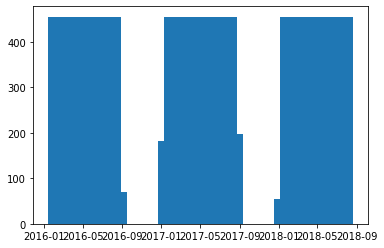

'Наименование столбца'

'final.output.concentrate_ag'

'Гистограмма'

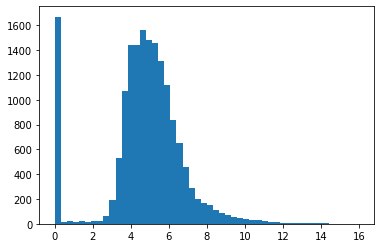

'Наименование столбца'

'final.output.concentrate_pb'

'Гистограмма'

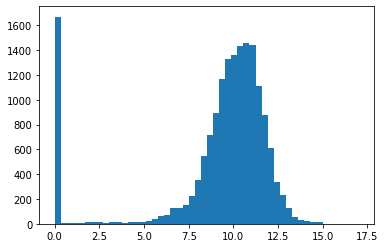

'Наименование столбца'

'final.output.concentrate_sol'

'Гистограмма'

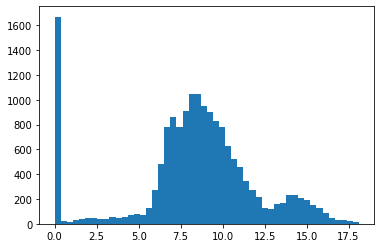

'Наименование столбца'

'final.output.concentrate_au'

'Гистограмма'

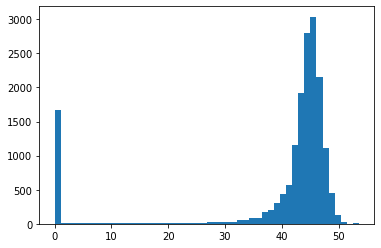

'Наименование столбца'

'final.output.recovery'

'Гистограмма'

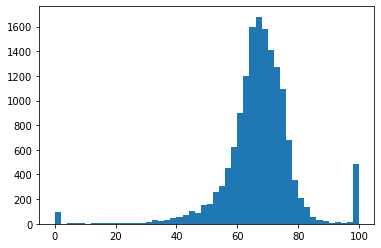

'Наименование столбца'

'final.output.tail_ag'

'Гистограмма'

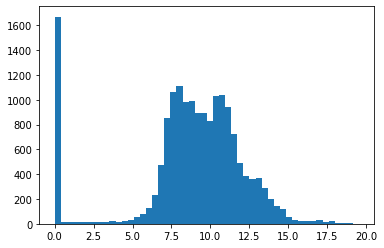

'Наименование столбца'

'final.output.tail_pb'

'Гистограмма'

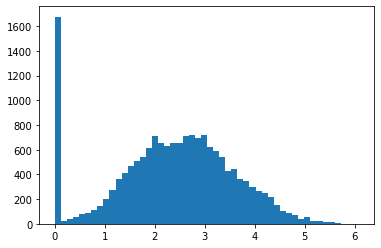

'Наименование столбца'

'final.output.tail_sol'

'Гистограмма'

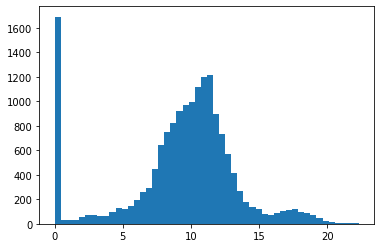

'Наименование столбца'

'final.output.tail_au'

'Гистограмма'

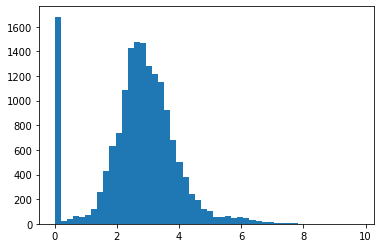

'Наименование столбца'

'primary_cleaner.input.sulfate'

'Гистограмма'

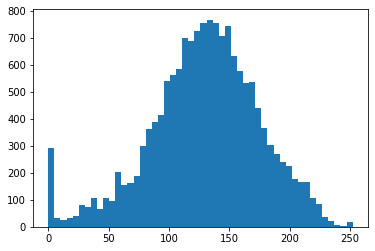

'Наименование столбца'

'primary_cleaner.input.depressant'

'Гистограмма'

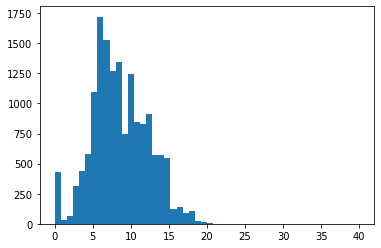

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Гистограмма'

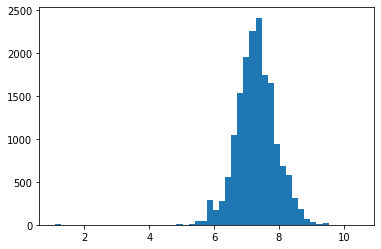

'Наименование столбца'

'primary_cleaner.input.xanthate'

'Гистограмма'

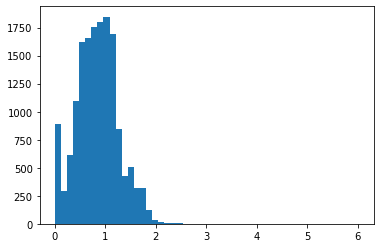

'Наименование столбца'

'primary_cleaner.output.concentrate_ag'

'Гистограмма'

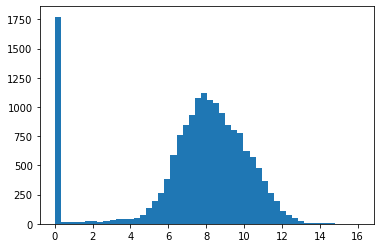

'Наименование столбца'

'primary_cleaner.output.concentrate_pb'

'Гистограмма'

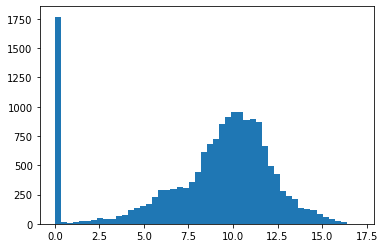

'Наименование столбца'

'primary_cleaner.output.concentrate_sol'

'Гистограмма'

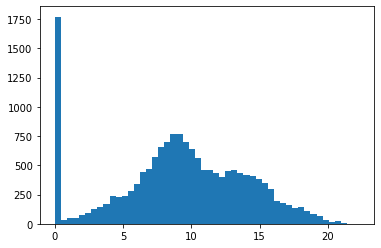

'Наименование столбца'

'primary_cleaner.output.concentrate_au'

'Гистограмма'

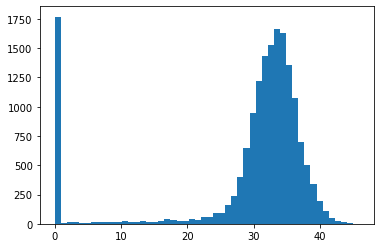

'Наименование столбца'

'primary_cleaner.output.tail_ag'

'Гистограмма'

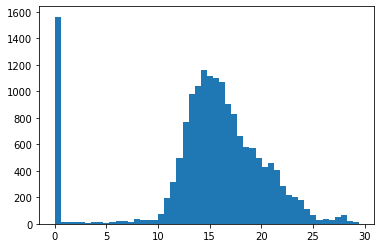

'Наименование столбца'

'primary_cleaner.output.tail_pb'

'Гистограмма'

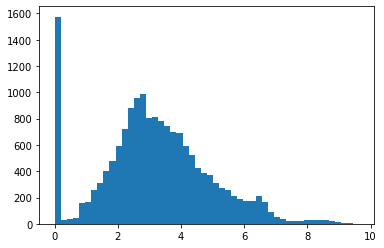

'Наименование столбца'

'primary_cleaner.output.tail_sol'

'Гистограмма'

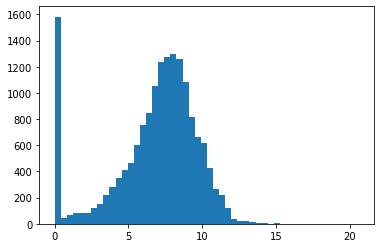

'Наименование столбца'

'primary_cleaner.output.tail_au'

'Гистограмма'

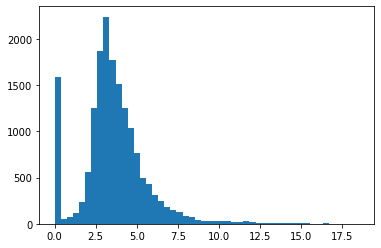

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_air'

'Гистограмма'

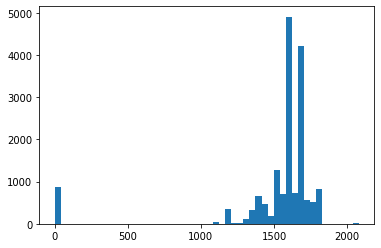

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_level'

'Гистограмма'

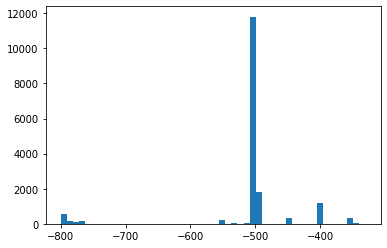

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_air'

'Гистограмма'

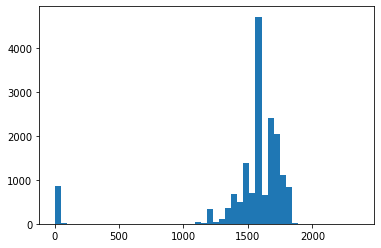

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_level'

'Гистограмма'

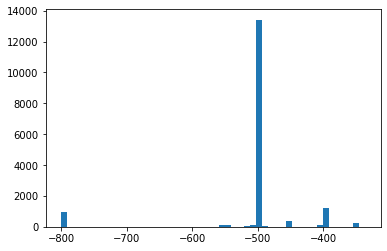

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_air'

'Гистограмма'

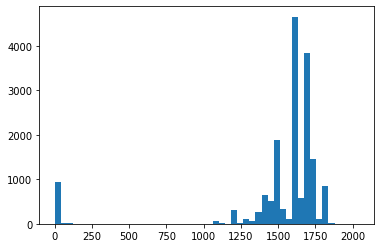

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_level'

'Гистограмма'

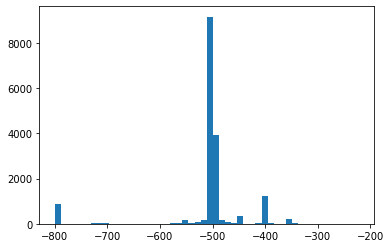

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_air'

'Гистограмма'

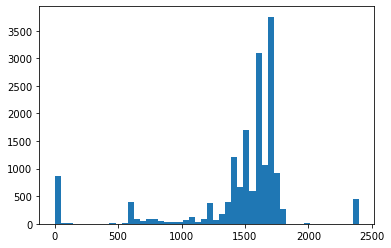

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_level'

'Гистограмма'

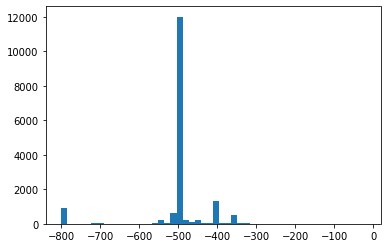

'Наименование столбца'

'rougher.calculation.sulfate_to_au_concentrate'

'Гистограмма'

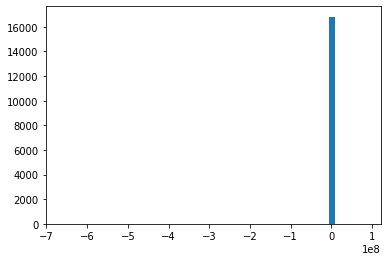

'Наименование столбца'

'rougher.calculation.floatbank10_sulfate_to_au_feed'

'Гистограмма'

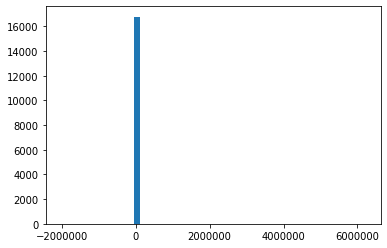

'Наименование столбца'

'rougher.calculation.floatbank11_sulfate_to_au_feed'

'Гистограмма'

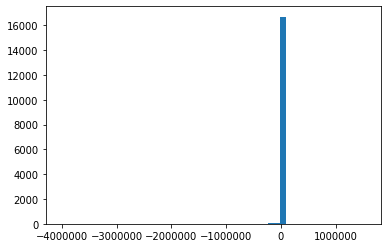

'Наименование столбца'

'rougher.calculation.au_pb_ratio'

'Гистограмма'

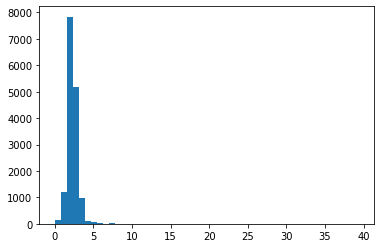

'Наименование столбца'

'rougher.input.feed_ag'

'Гистограмма'

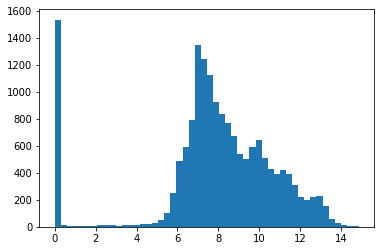

'Наименование столбца'

'rougher.input.feed_pb'

'Гистограмма'

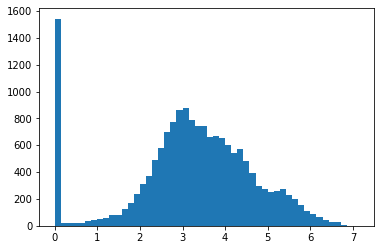

'Наименование столбца'

'rougher.input.feed_rate'

'Гистограмма'

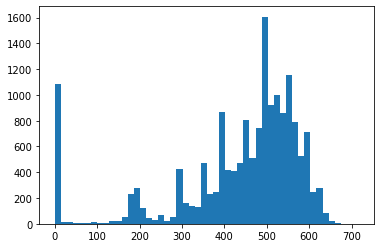

'Наименование столбца'

'rougher.input.feed_size'

'Гистограмма'

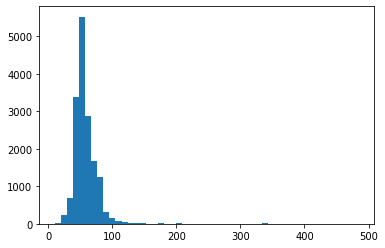

'Наименование столбца'

'rougher.input.feed_sol'

'Гистограмма'

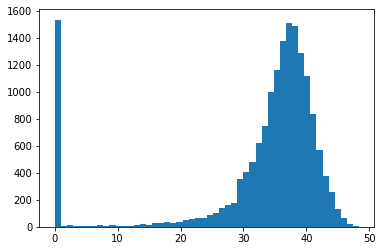

'Наименование столбца'

'rougher.input.feed_au'

'Гистограмма'

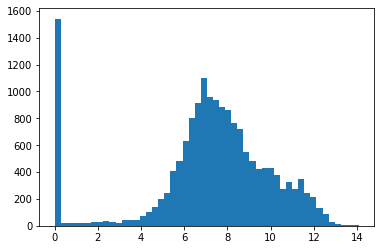

'Наименование столбца'

'rougher.input.floatbank10_sulfate'

'Гистограмма'

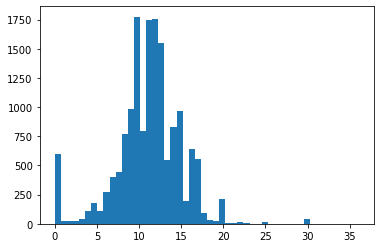

'Наименование столбца'

'rougher.input.floatbank10_xanthate'

'Гистограмма'

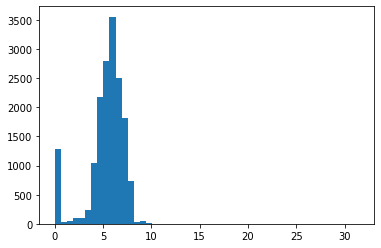

'Наименование столбца'

'rougher.input.floatbank11_sulfate'

'Гистограмма'

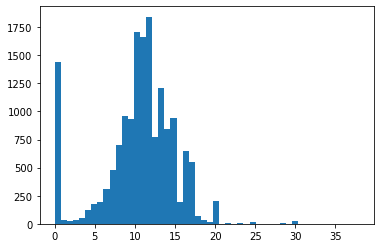

'Наименование столбца'

'rougher.input.floatbank11_xanthate'

'Гистограмма'

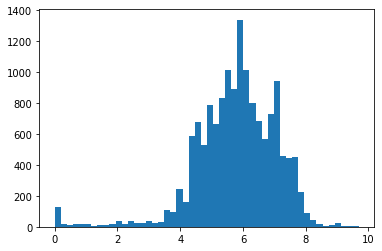

'Наименование столбца'

'rougher.output.concentrate_ag'

'Гистограмма'

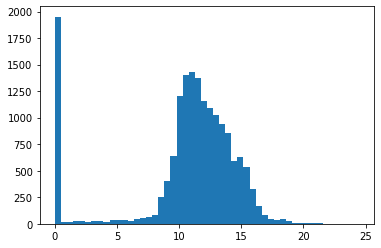

'Наименование столбца'

'rougher.output.concentrate_pb'

'Гистограмма'

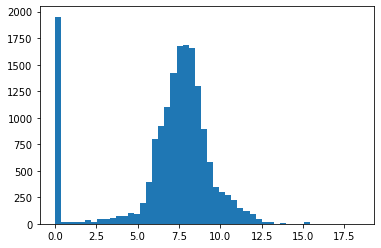

'Наименование столбца'

'rougher.output.concentrate_sol'

'Гистограмма'

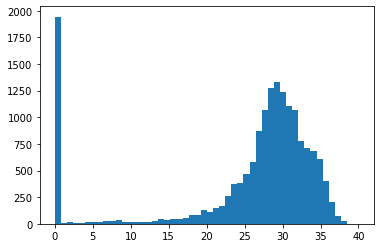

'Наименование столбца'

'rougher.output.concentrate_au'

'Гистограмма'

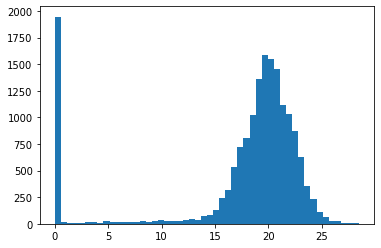

'Наименование столбца'

'rougher.output.recovery'

'Гистограмма'

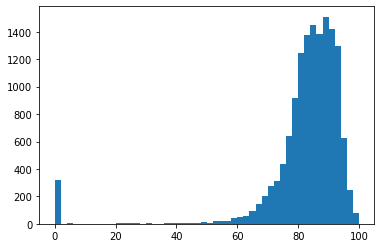

'Наименование столбца'

'rougher.output.tail_ag'

'Гистограмма'

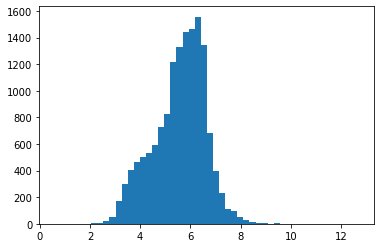

'Наименование столбца'

'rougher.output.tail_pb'

'Гистограмма'

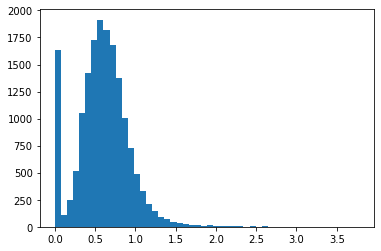

'Наименование столбца'

'rougher.output.tail_sol'

'Гистограмма'

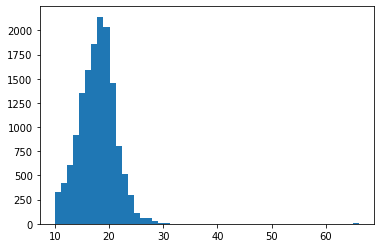

'Наименование столбца'

'rougher.output.tail_au'

'Гистограмма'

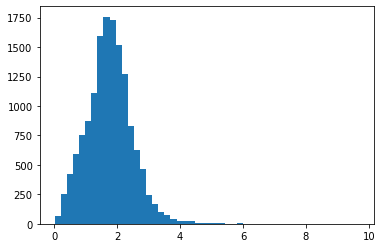

'Наименование столбца'

'rougher.state.floatbank10_a_air'

'Гистограмма'

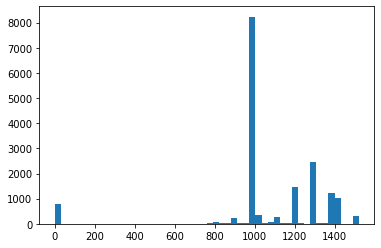

'Наименование столбца'

'rougher.state.floatbank10_a_level'

'Гистограмма'

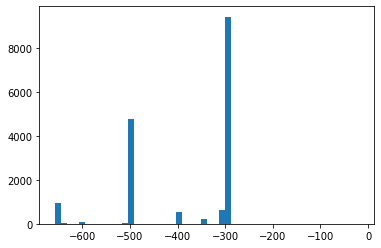

'Наименование столбца'

'rougher.state.floatbank10_b_air'

'Гистограмма'

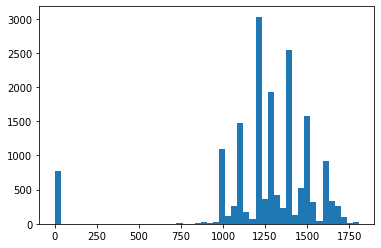

'Наименование столбца'

'rougher.state.floatbank10_b_level'

'Гистограмма'

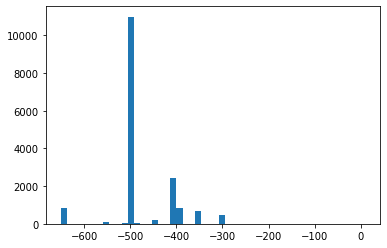

'Наименование столбца'

'rougher.state.floatbank10_c_air'

'Гистограмма'

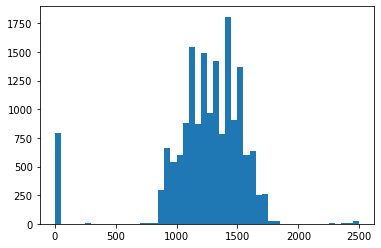

'Наименование столбца'

'rougher.state.floatbank10_c_level'

'Гистограмма'

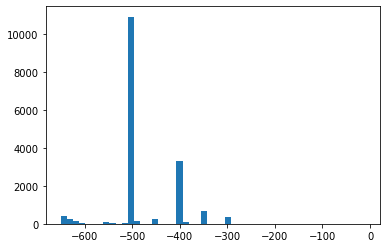

'Наименование столбца'

'rougher.state.floatbank10_d_air'

'Гистограмма'

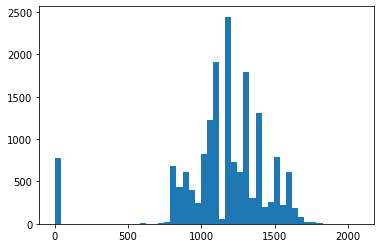

'Наименование столбца'

'rougher.state.floatbank10_d_level'

'Гистограмма'

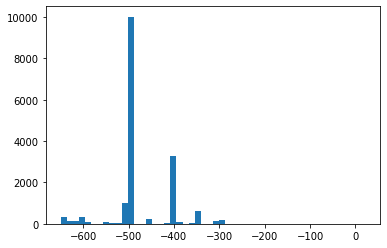

'Наименование столбца'

'rougher.state.floatbank10_e_air'

'Гистограмма'

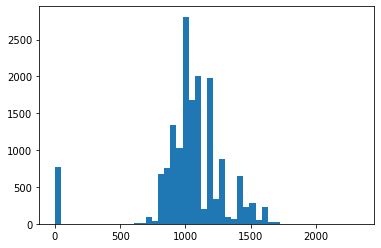

'Наименование столбца'

'rougher.state.floatbank10_e_level'

'Гистограмма'

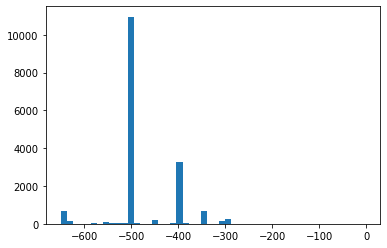

'Наименование столбца'

'rougher.state.floatbank10_f_air'

'Гистограмма'

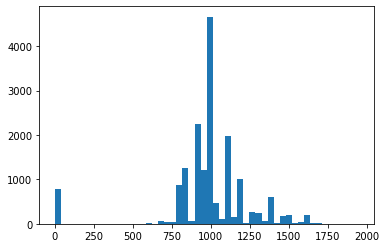

'Наименование столбца'

'rougher.state.floatbank10_f_level'

'Гистограмма'

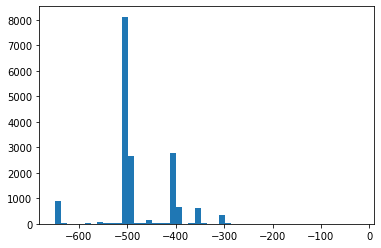

'Наименование столбца'

'secondary_cleaner.output.tail_ag'

'Гистограмма'

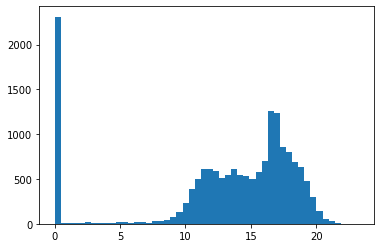

'Наименование столбца'

'secondary_cleaner.output.tail_pb'

'Гистограмма'

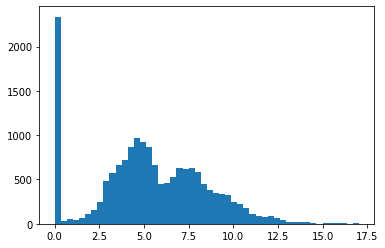

'Наименование столбца'

'secondary_cleaner.output.tail_sol'

'Гистограмма'

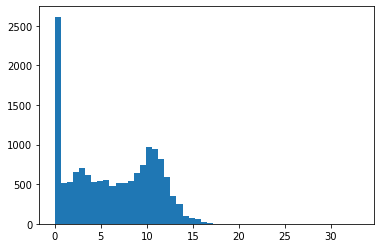

'Наименование столбца'

'secondary_cleaner.output.tail_au'

'Гистограмма'

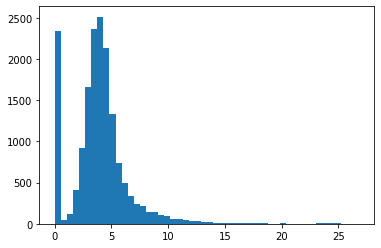

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_air'

'Гистограмма'

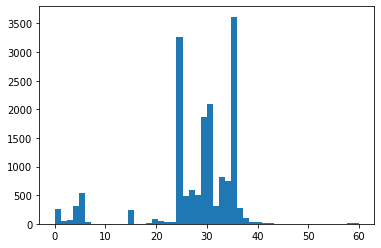

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_level'

'Гистограмма'

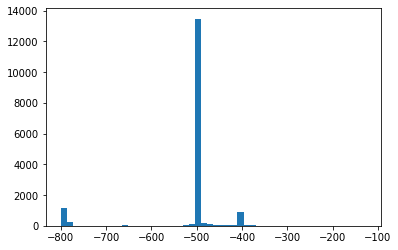

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_air'

'Гистограмма'

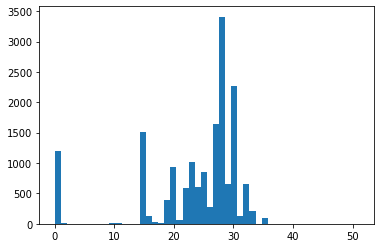

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_level'

'Гистограмма'

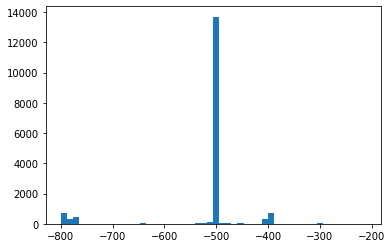

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_air'

'Гистограмма'

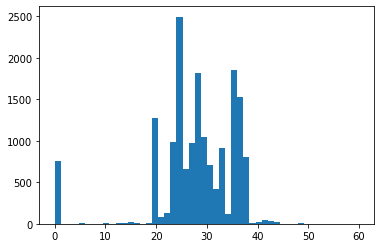

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_level'

'Гистограмма'

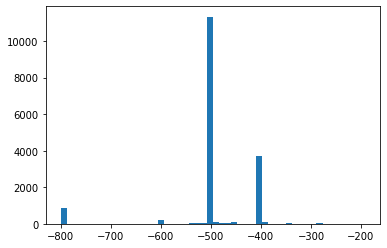

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_air'

'Гистограмма'

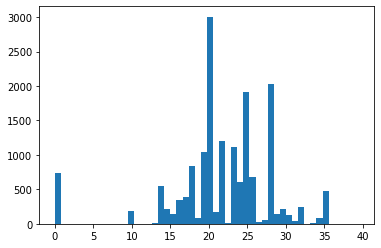

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_level'

'Гистограмма'

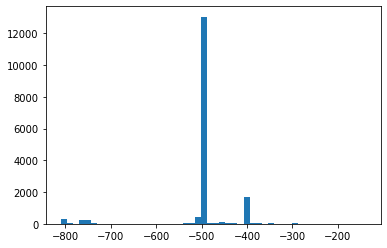

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_air'

'Гистограмма'

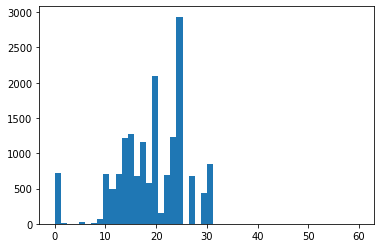

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_level'

'Гистограмма'

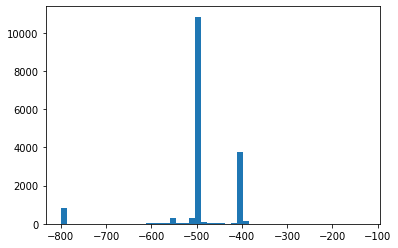

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_air'

'Гистограмма'

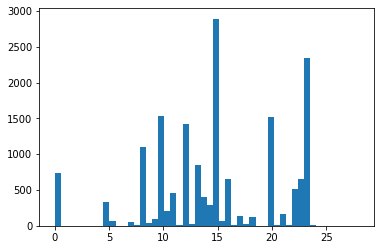

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_level'

'Гистограмма'

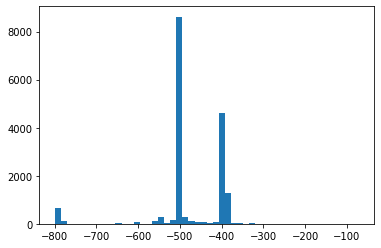

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_air'

'Гистограмма'

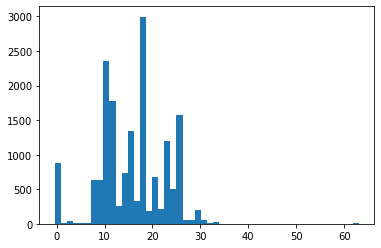

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_level'

'Гистограмма'

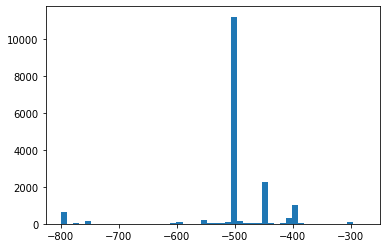

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_air'

'Гистограмма'

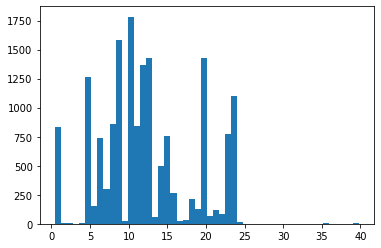

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_level'

'Гистограмма'

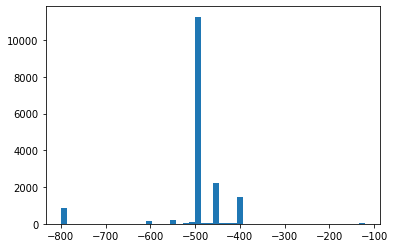

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_air'

'Гистограмма'

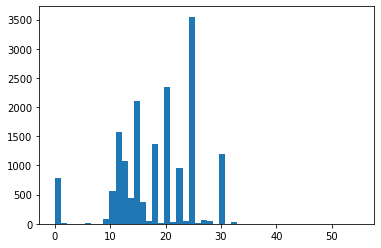

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_level'

'Гистограмма'

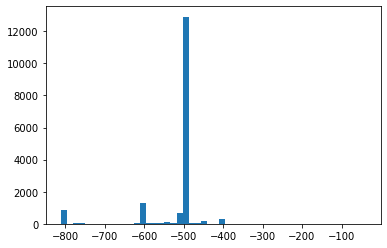

In [40]:
hist(df_train, 50)

In [41]:
df_train = df_train.fillna(method='ffill')

Заменил на предыдущее значение. Так как поступление датированное

#### df_test

'Наименование столбца'

'date'

'Гистограмма'

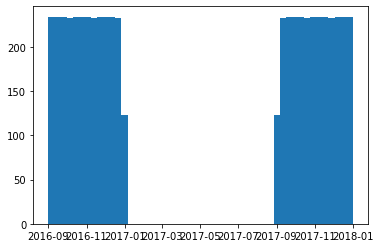

'Наименование столбца'

'primary_cleaner.input.sulfate'

'Гистограмма'

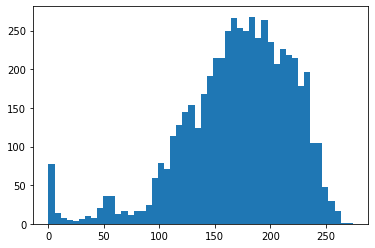

'Наименование столбца'

'primary_cleaner.input.depressant'

'Гистограмма'

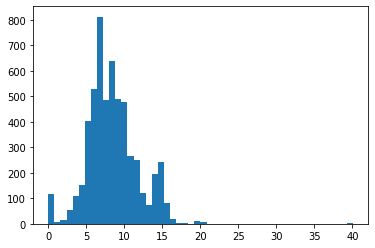

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Гистограмма'

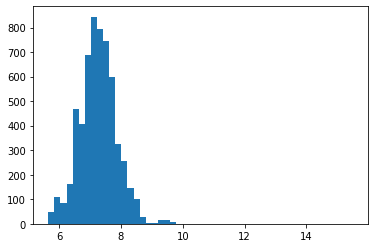

'Наименование столбца'

'primary_cleaner.input.xanthate'

'Гистограмма'

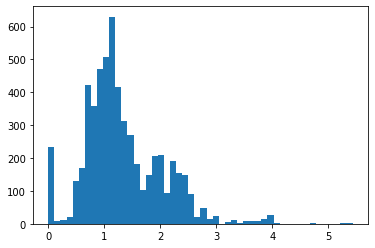

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_air'

'Гистограмма'

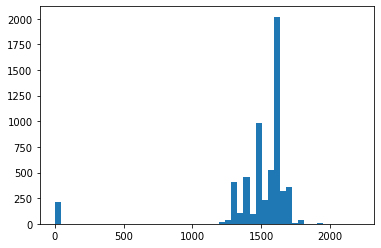

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_level'

'Гистограмма'

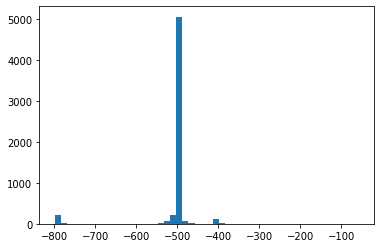

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_air'

'Гистограмма'

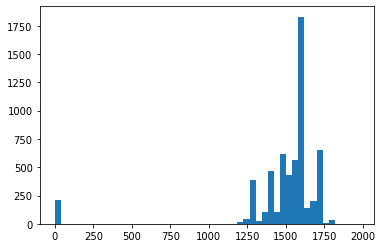

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_level'

'Гистограмма'

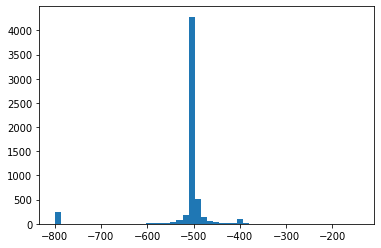

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_air'

'Гистограмма'

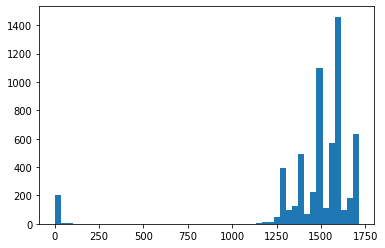

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_level'

'Гистограмма'

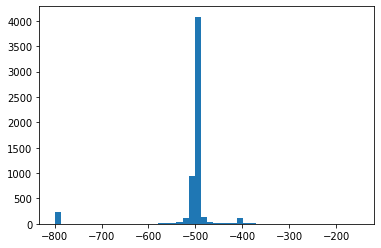

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_air'

'Гистограмма'

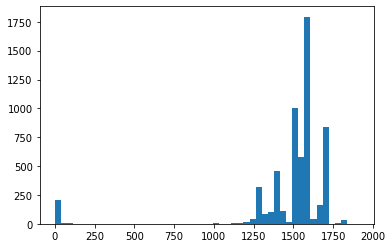

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_level'

'Гистограмма'

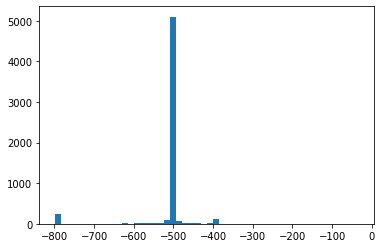

'Наименование столбца'

'rougher.input.feed_ag'

'Гистограмма'

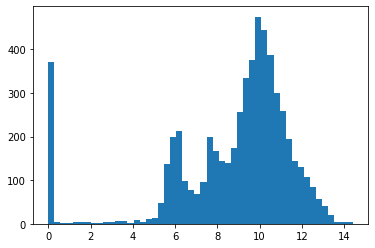

'Наименование столбца'

'rougher.input.feed_pb'

'Гистограмма'

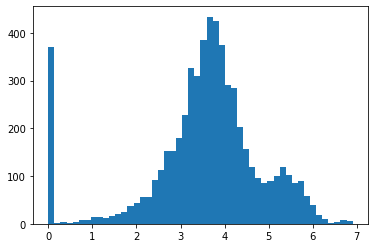

'Наименование столбца'

'rougher.input.feed_rate'

'Гистограмма'

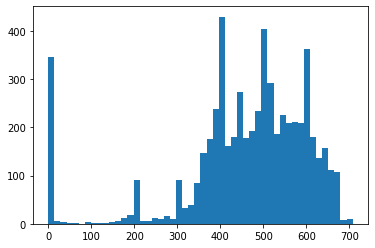

'Наименование столбца'

'rougher.input.feed_size'

'Гистограмма'

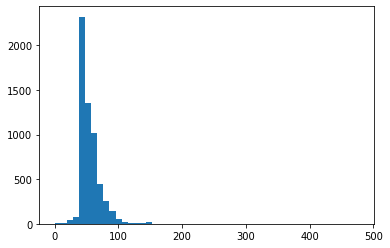

'Наименование столбца'

'rougher.input.feed_sol'

'Гистограмма'

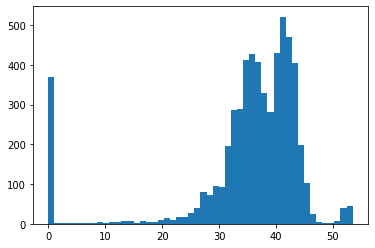

'Наименование столбца'

'rougher.input.feed_au'

'Гистограмма'

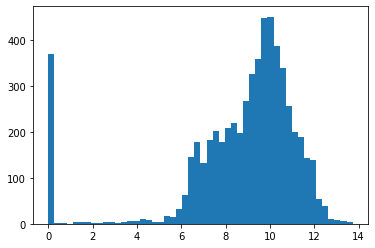

'Наименование столбца'

'rougher.input.floatbank10_sulfate'

'Гистограмма'

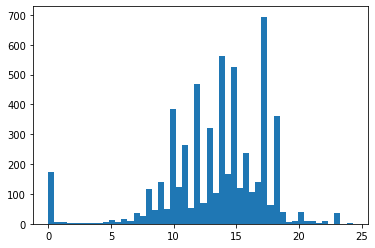

'Наименование столбца'

'rougher.input.floatbank10_xanthate'

'Гистограмма'

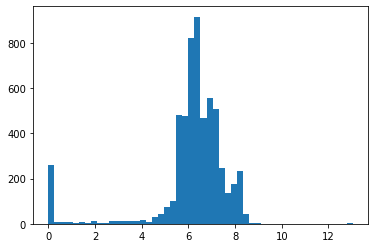

'Наименование столбца'

'rougher.input.floatbank11_sulfate'

'Гистограмма'

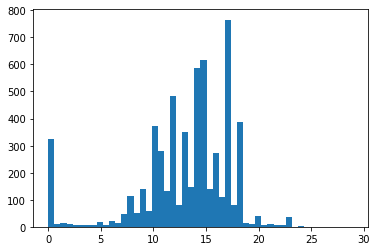

'Наименование столбца'

'rougher.input.floatbank11_xanthate'

'Гистограмма'

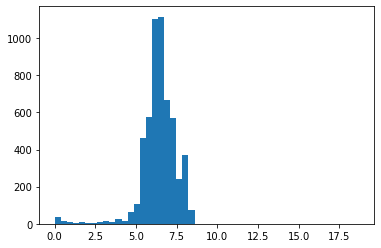

'Наименование столбца'

'rougher.state.floatbank10_a_air'

'Гистограмма'

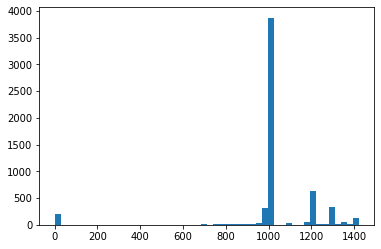

'Наименование столбца'

'rougher.state.floatbank10_a_level'

'Гистограмма'

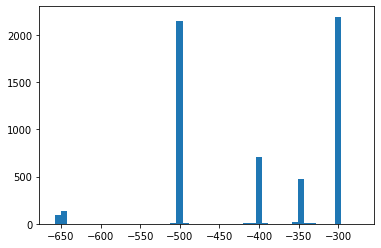

'Наименование столбца'

'rougher.state.floatbank10_b_air'

'Гистограмма'

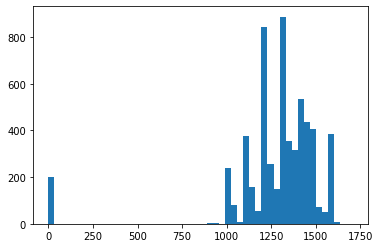

'Наименование столбца'

'rougher.state.floatbank10_b_level'

'Гистограмма'

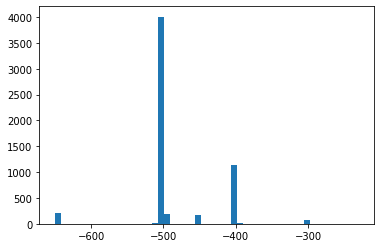

'Наименование столбца'

'rougher.state.floatbank10_c_air'

'Гистограмма'

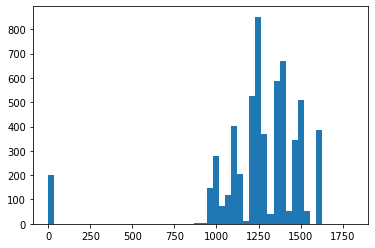

'Наименование столбца'

'rougher.state.floatbank10_c_level'

'Гистограмма'

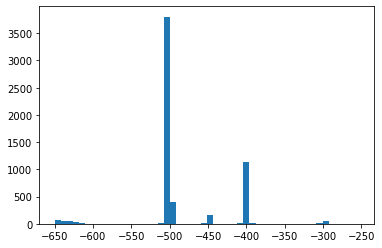

'Наименование столбца'

'rougher.state.floatbank10_d_air'

'Гистограмма'

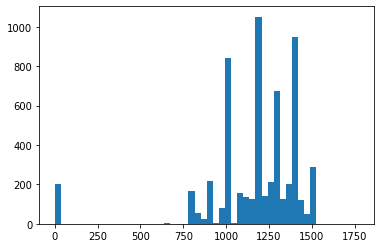

'Наименование столбца'

'rougher.state.floatbank10_d_level'

'Гистограмма'

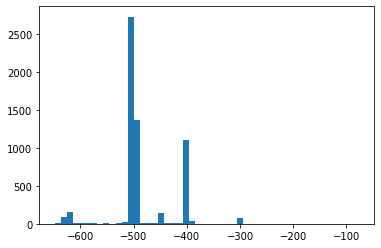

'Наименование столбца'

'rougher.state.floatbank10_e_air'

'Гистограмма'

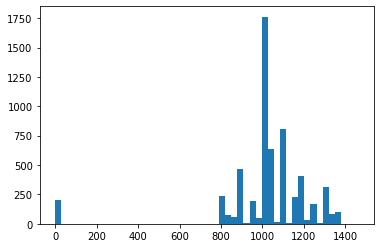

'Наименование столбца'

'rougher.state.floatbank10_e_level'

'Гистограмма'

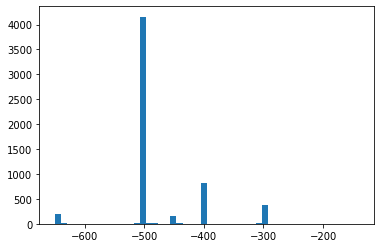

'Наименование столбца'

'rougher.state.floatbank10_f_air'

'Гистограмма'

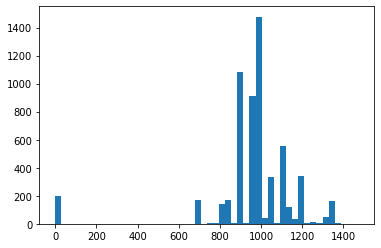

'Наименование столбца'

'rougher.state.floatbank10_f_level'

'Гистограмма'

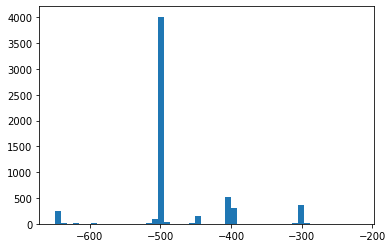

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_air'

'Гистограмма'

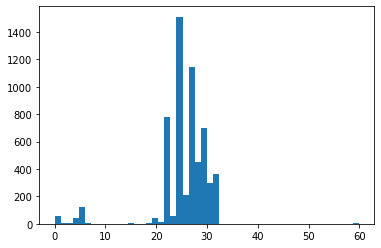

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_level'

'Гистограмма'

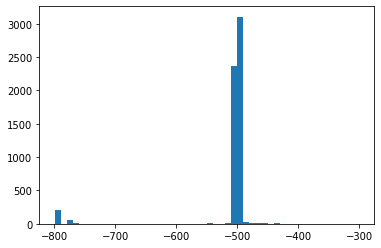

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_air'

'Гистограмма'

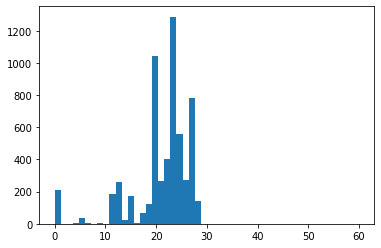

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_level'

'Гистограмма'

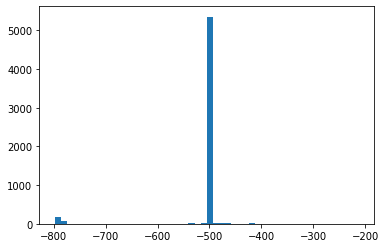

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_air'

'Гистограмма'

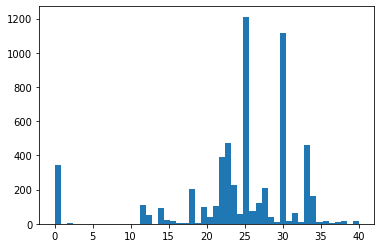

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_level'

'Гистограмма'

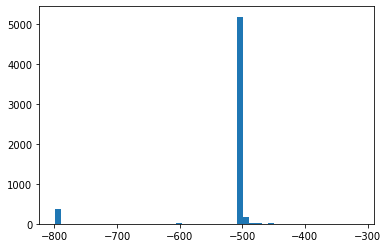

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_air'

'Гистограмма'

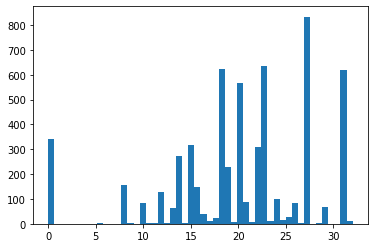

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_level'

'Гистограмма'

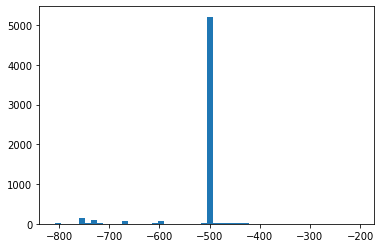

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_air'

'Гистограмма'

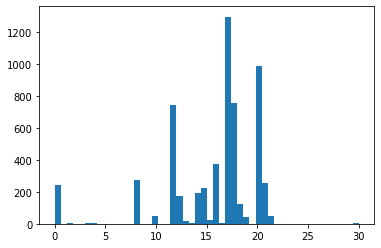

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_level'

'Гистограмма'

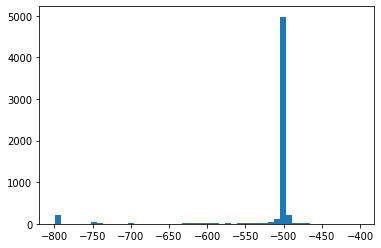

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_air'

'Гистограмма'

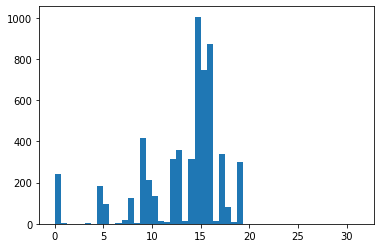

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_level'

'Гистограмма'

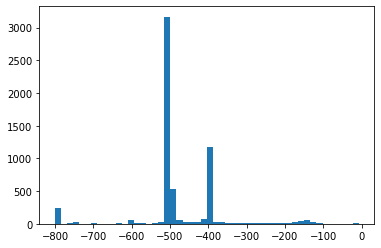

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_air'

'Гистограмма'

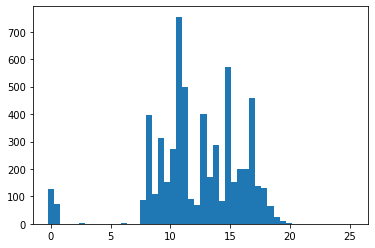

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_level'

'Гистограмма'

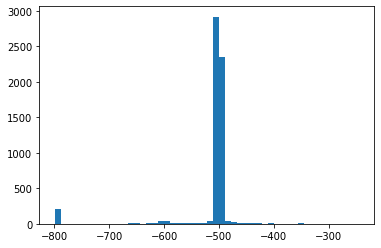

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_air'

'Гистограмма'

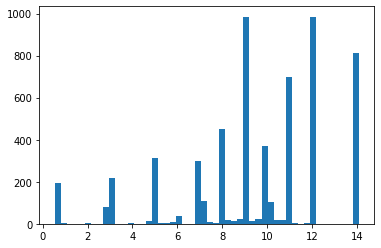

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_level'

'Гистограмма'

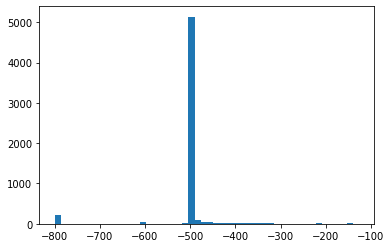

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_air'

'Гистограмма'

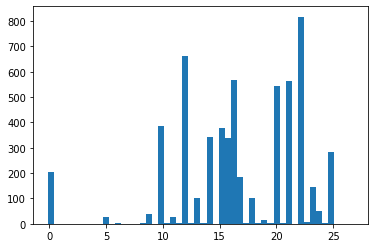

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_level'

'Гистограмма'

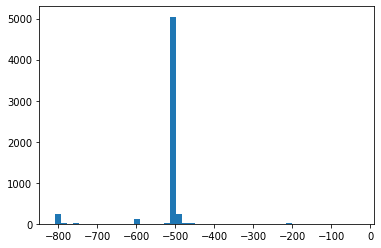

In [42]:
hist(df_test, 50)

In [43]:
df_test = df_test.fillna(method='ffill')

Заменил на предыдущее значение. Так как поступление датированное

#### df_full

'Наименование столбца'

'date'

'Гистограмма'

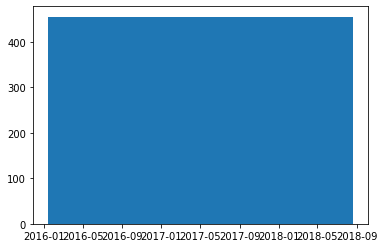

'Наименование столбца'

'final.output.concentrate_ag'

'Гистограмма'

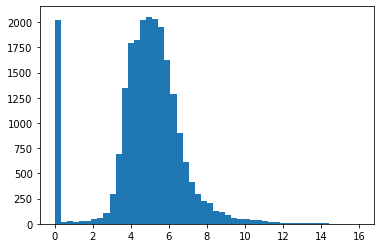

'Наименование столбца'

'final.output.concentrate_pb'

'Гистограмма'

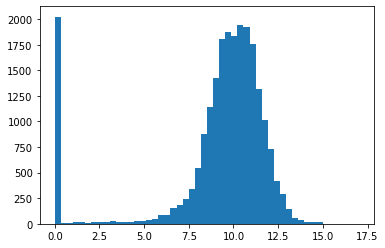

'Наименование столбца'

'final.output.concentrate_sol'

'Гистограмма'

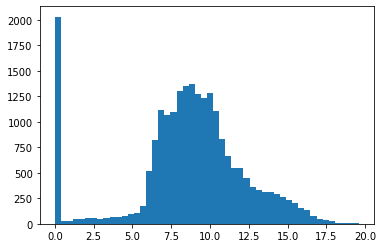

'Наименование столбца'

'final.output.concentrate_au'

'Гистограмма'

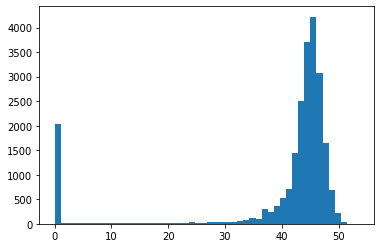

'Наименование столбца'

'final.output.recovery'

'Гистограмма'

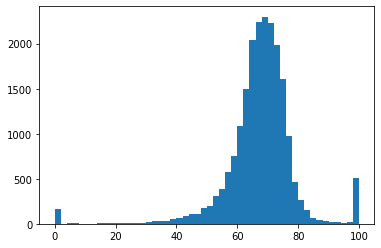

'Наименование столбца'

'final.output.tail_ag'

'Гистограмма'

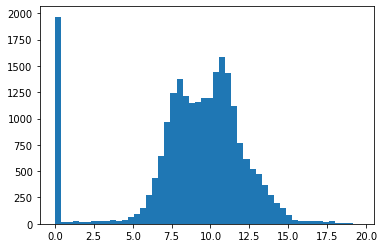

'Наименование столбца'

'final.output.tail_pb'

'Гистограмма'

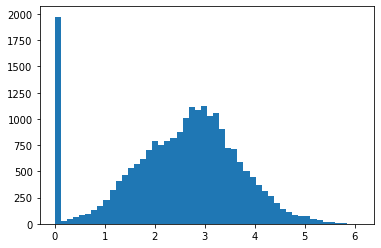

'Наименование столбца'

'final.output.tail_sol'

'Гистограмма'

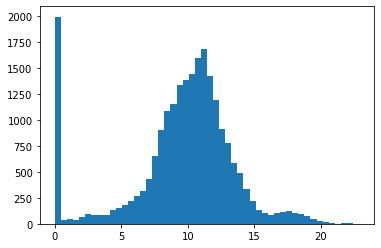

'Наименование столбца'

'final.output.tail_au'

'Гистограмма'

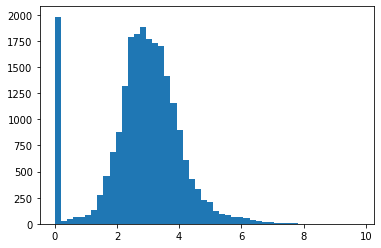

'Наименование столбца'

'primary_cleaner.input.sulfate'

'Гистограмма'

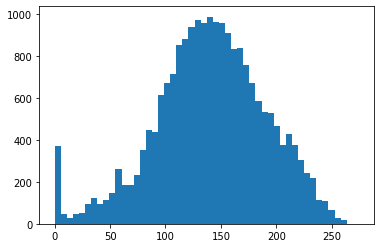

'Наименование столбца'

'primary_cleaner.input.depressant'

'Гистограмма'

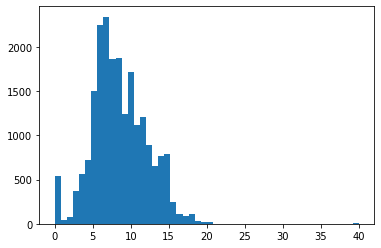

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Гистограмма'

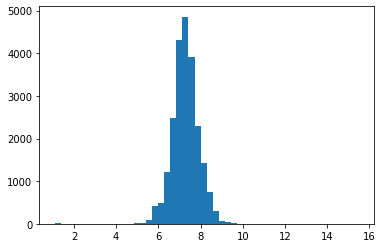

'Наименование столбца'

'primary_cleaner.input.xanthate'

'Гистограмма'

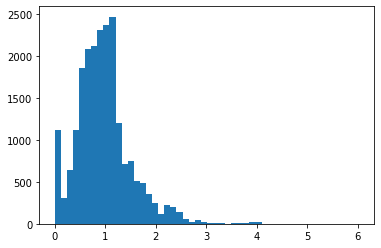

'Наименование столбца'

'primary_cleaner.output.concentrate_ag'

'Гистограмма'

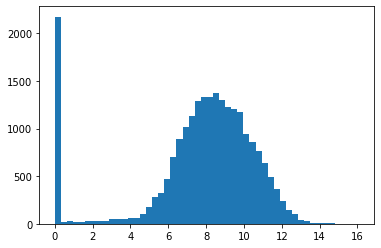

'Наименование столбца'

'primary_cleaner.output.concentrate_pb'

'Гистограмма'

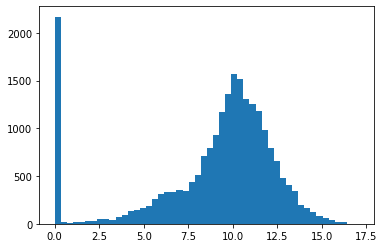

'Наименование столбца'

'primary_cleaner.output.concentrate_sol'

'Гистограмма'

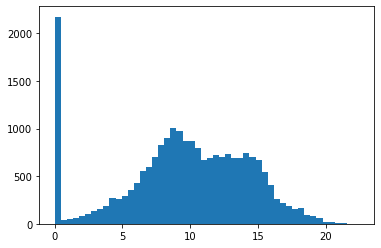

'Наименование столбца'

'primary_cleaner.output.concentrate_au'

'Гистограмма'

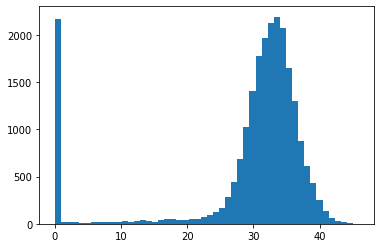

'Наименование столбца'

'primary_cleaner.output.tail_ag'

'Гистограмма'

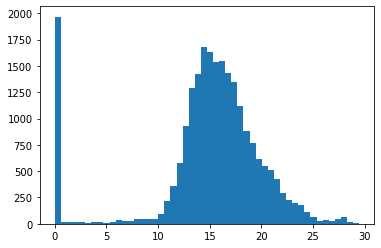

'Наименование столбца'

'primary_cleaner.output.tail_pb'

'Гистограмма'

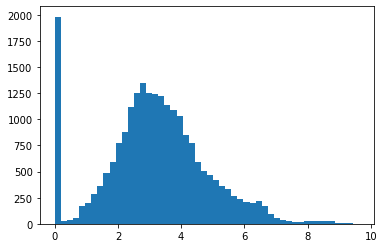

'Наименование столбца'

'primary_cleaner.output.tail_sol'

'Гистограмма'

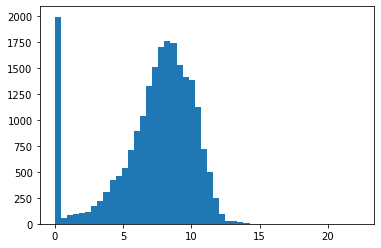

'Наименование столбца'

'primary_cleaner.output.tail_au'

'Гистограмма'

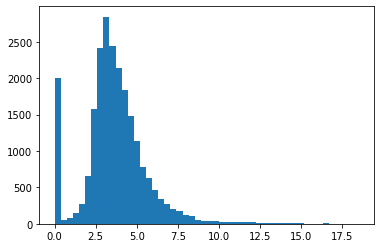

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_air'

'Гистограмма'

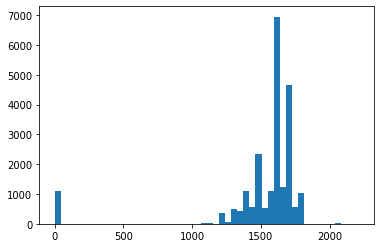

'Наименование столбца'

'primary_cleaner.state.floatbank8_a_level'

'Гистограмма'

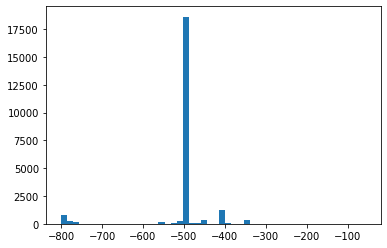

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_air'

'Гистограмма'

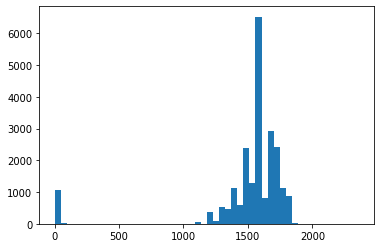

'Наименование столбца'

'primary_cleaner.state.floatbank8_b_level'

'Гистограмма'

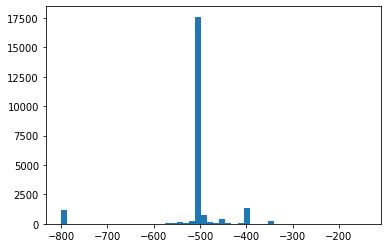

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_air'

'Гистограмма'

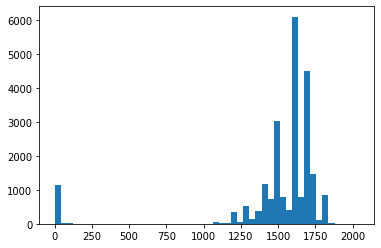

'Наименование столбца'

'primary_cleaner.state.floatbank8_c_level'

'Гистограмма'

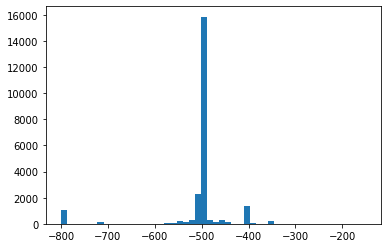

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_air'

'Гистограмма'

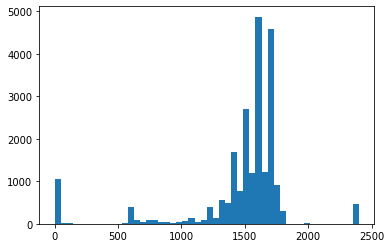

'Наименование столбца'

'primary_cleaner.state.floatbank8_d_level'

'Гистограмма'

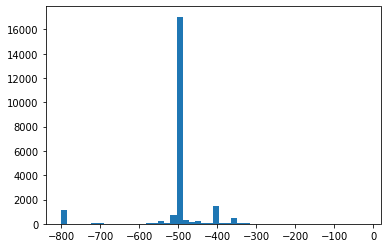

'Наименование столбца'

'rougher.calculation.sulfate_to_au_concentrate'

'Гистограмма'

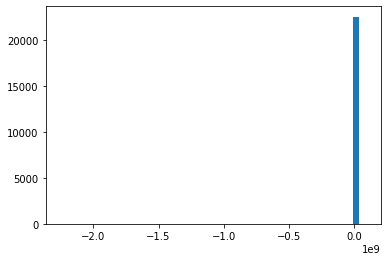

'Наименование столбца'

'rougher.calculation.floatbank10_sulfate_to_au_feed'

'Гистограмма'

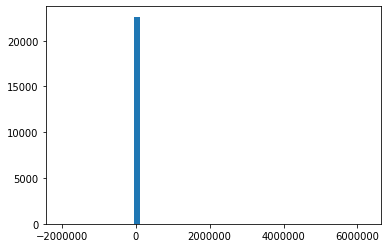

'Наименование столбца'

'rougher.calculation.floatbank11_sulfate_to_au_feed'

'Гистограмма'

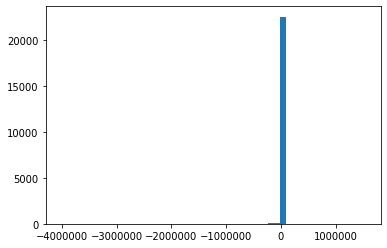

'Наименование столбца'

'rougher.calculation.au_pb_ratio'

'Гистограмма'

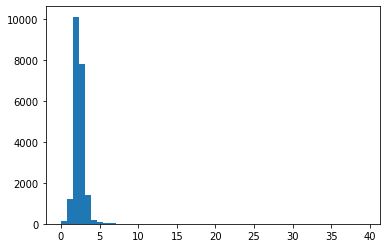

'Наименование столбца'

'rougher.input.feed_ag'

'Гистограмма'

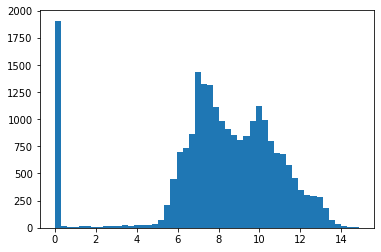

'Наименование столбца'

'rougher.input.feed_pb'

'Гистограмма'

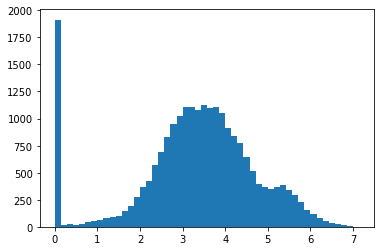

'Наименование столбца'

'rougher.input.feed_rate'

'Гистограмма'

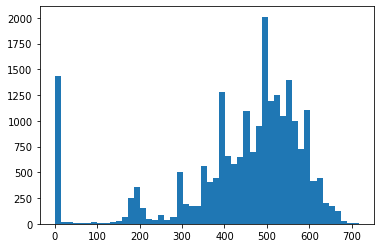

'Наименование столбца'

'rougher.input.feed_size'

'Гистограмма'

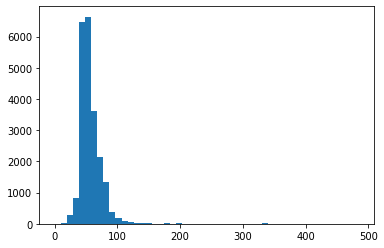

'Наименование столбца'

'rougher.input.feed_sol'

'Гистограмма'

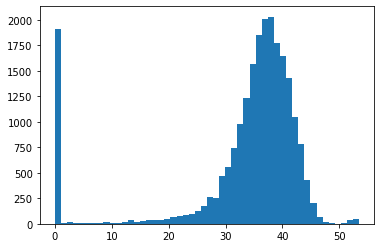

'Наименование столбца'

'rougher.input.feed_au'

'Гистограмма'

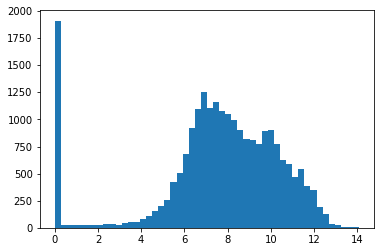

'Наименование столбца'

'rougher.input.floatbank10_sulfate'

'Гистограмма'

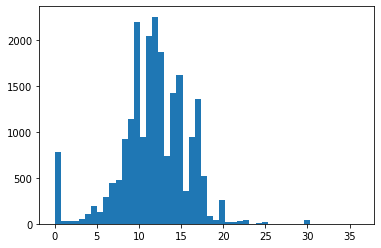

'Наименование столбца'

'rougher.input.floatbank10_xanthate'

'Гистограмма'

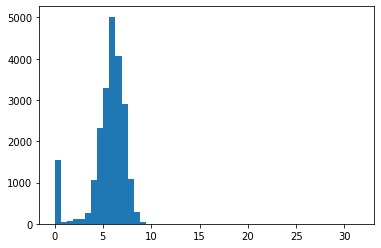

'Наименование столбца'

'rougher.input.floatbank11_sulfate'

'Гистограмма'

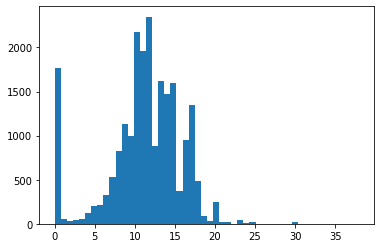

'Наименование столбца'

'rougher.input.floatbank11_xanthate'

'Гистограмма'

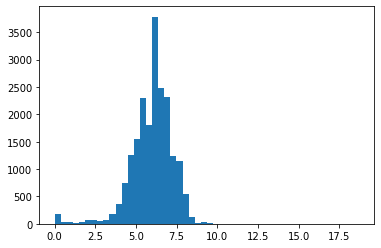

'Наименование столбца'

'rougher.output.concentrate_ag'

'Гистограмма'

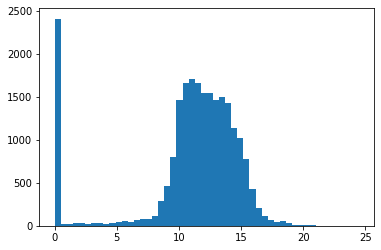

'Наименование столбца'

'rougher.output.concentrate_pb'

'Гистограмма'

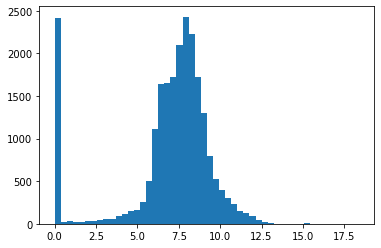

'Наименование столбца'

'rougher.output.concentrate_sol'

'Гистограмма'

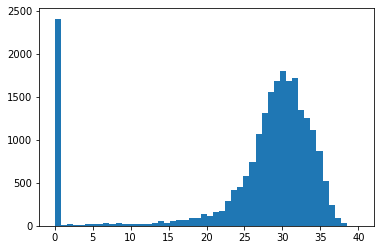

'Наименование столбца'

'rougher.output.concentrate_au'

'Гистограмма'

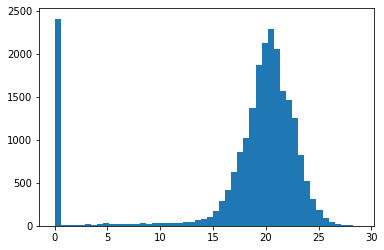

'Наименование столбца'

'rougher.output.recovery'

'Гистограмма'

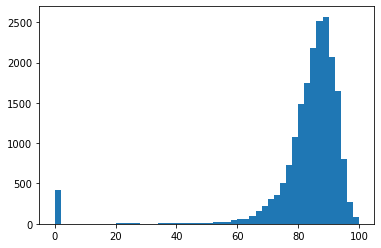

'Наименование столбца'

'rougher.output.tail_ag'

'Гистограмма'

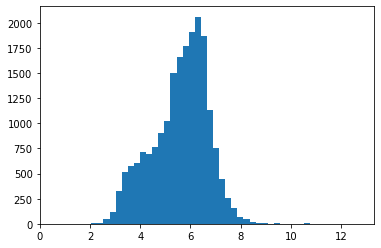

'Наименование столбца'

'rougher.output.tail_pb'

'Гистограмма'

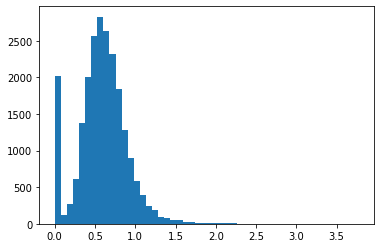

'Наименование столбца'

'rougher.output.tail_sol'

'Гистограмма'

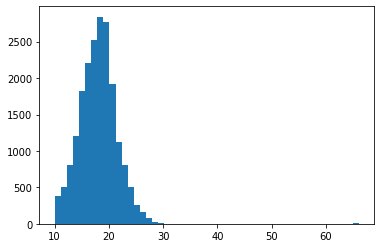

'Наименование столбца'

'rougher.output.tail_au'

'Гистограмма'

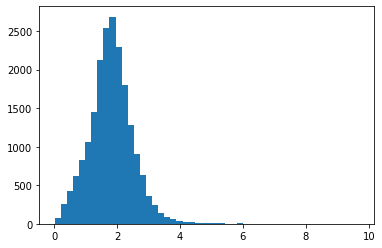

'Наименование столбца'

'rougher.state.floatbank10_a_air'

'Гистограмма'

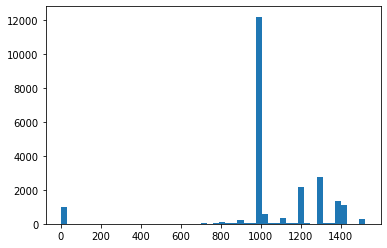

'Наименование столбца'

'rougher.state.floatbank10_a_level'

'Гистограмма'

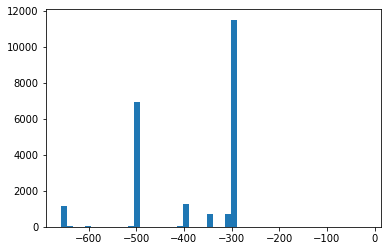

'Наименование столбца'

'rougher.state.floatbank10_b_air'

'Гистограмма'

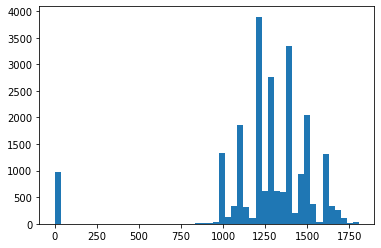

'Наименование столбца'

'rougher.state.floatbank10_b_level'

'Гистограмма'

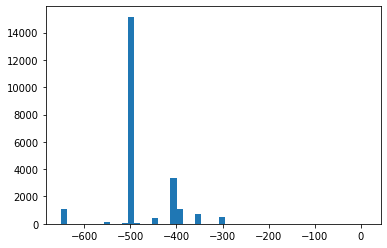

'Наименование столбца'

'rougher.state.floatbank10_c_air'

'Гистограмма'

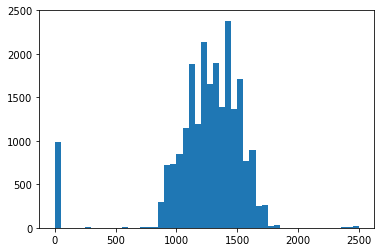

'Наименование столбца'

'rougher.state.floatbank10_c_level'

'Гистограмма'

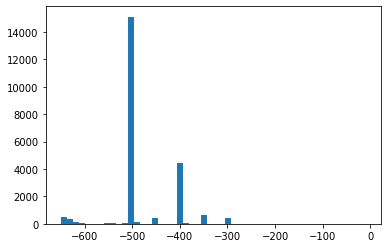

'Наименование столбца'

'rougher.state.floatbank10_d_air'

'Гистограмма'

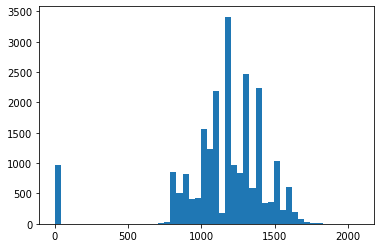

'Наименование столбца'

'rougher.state.floatbank10_d_level'

'Гистограмма'

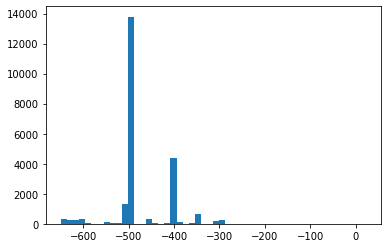

'Наименование столбца'

'rougher.state.floatbank10_e_air'

'Гистограмма'

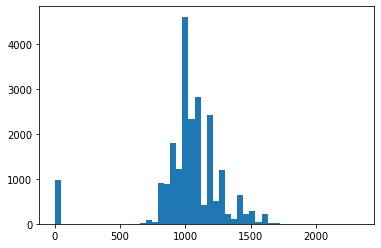

'Наименование столбца'

'rougher.state.floatbank10_e_level'

'Гистограмма'

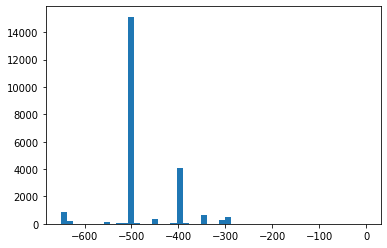

'Наименование столбца'

'rougher.state.floatbank10_f_air'

'Гистограмма'

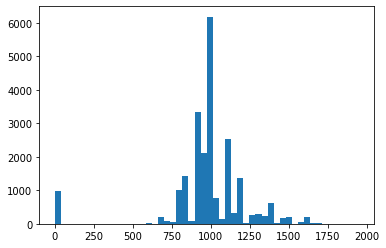

'Наименование столбца'

'rougher.state.floatbank10_f_level'

'Гистограмма'

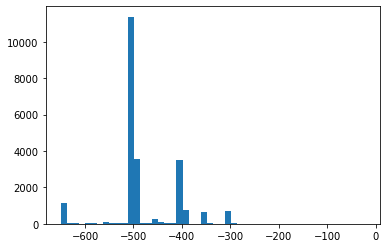

'Наименование столбца'

'secondary_cleaner.output.tail_ag'

'Гистограмма'

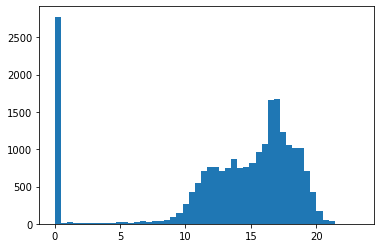

'Наименование столбца'

'secondary_cleaner.output.tail_pb'

'Гистограмма'

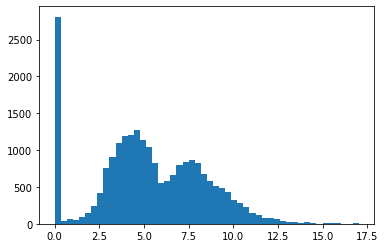

'Наименование столбца'

'secondary_cleaner.output.tail_sol'

'Гистограмма'

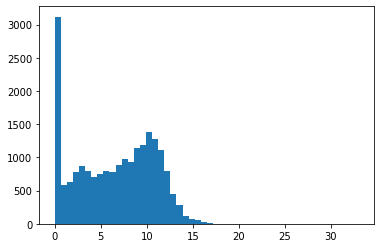

'Наименование столбца'

'secondary_cleaner.output.tail_au'

'Гистограмма'

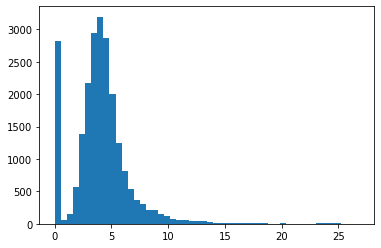

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_air'

'Гистограмма'

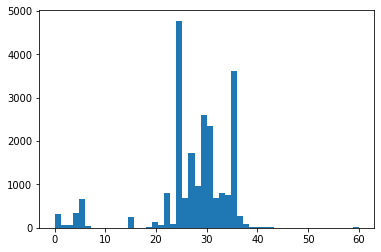

'Наименование столбца'

'secondary_cleaner.state.floatbank2_a_level'

'Гистограмма'

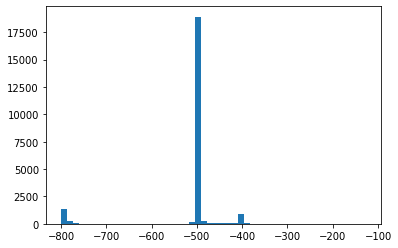

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_air'

'Гистограмма'

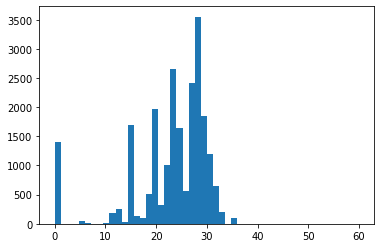

'Наименование столбца'

'secondary_cleaner.state.floatbank2_b_level'

'Гистограмма'

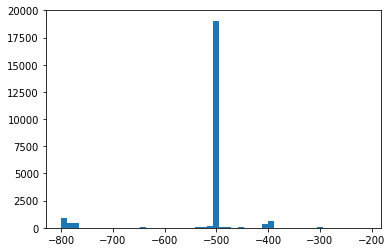

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_air'

'Гистограмма'

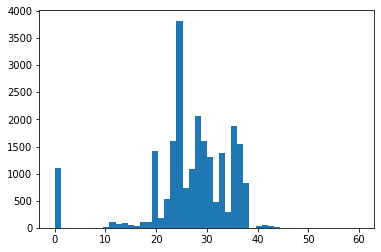

'Наименование столбца'

'secondary_cleaner.state.floatbank3_a_level'

'Гистограмма'

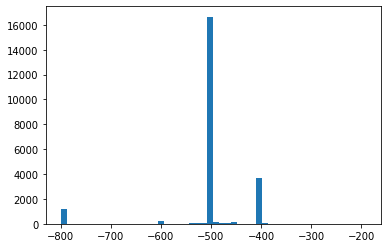

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_air'

'Гистограмма'

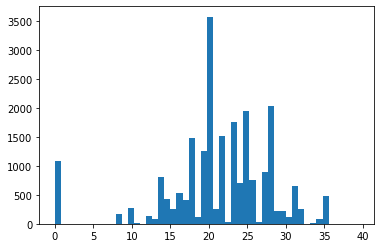

'Наименование столбца'

'secondary_cleaner.state.floatbank3_b_level'

'Гистограмма'

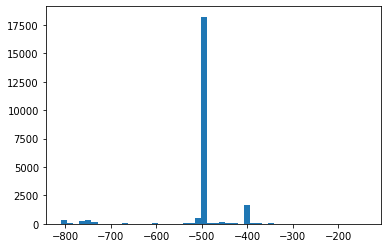

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_air'

'Гистограмма'

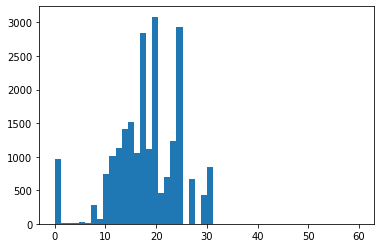

'Наименование столбца'

'secondary_cleaner.state.floatbank4_a_level'

'Гистограмма'

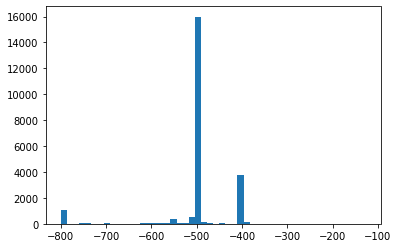

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_air'

'Гистограмма'

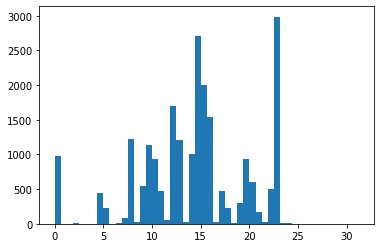

'Наименование столбца'

'secondary_cleaner.state.floatbank4_b_level'

'Гистограмма'

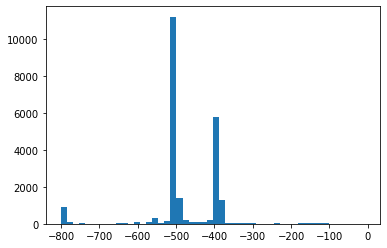

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_air'

'Гистограмма'

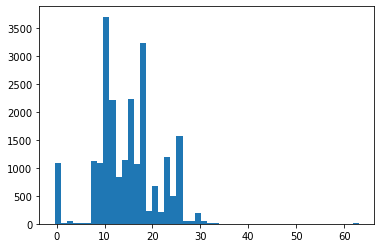

'Наименование столбца'

'secondary_cleaner.state.floatbank5_a_level'

'Гистограмма'

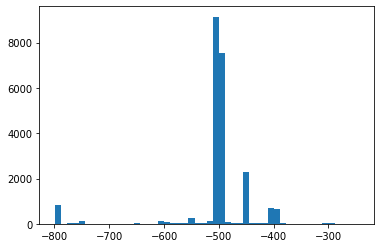

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_air'

'Гистограмма'

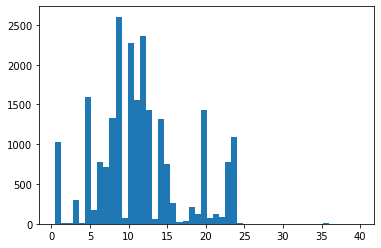

'Наименование столбца'

'secondary_cleaner.state.floatbank5_b_level'

'Гистограмма'

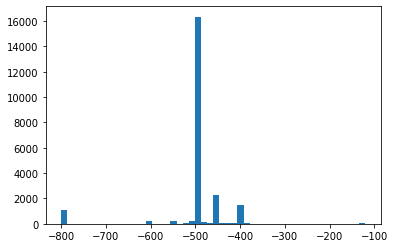

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_air'

'Гистограмма'

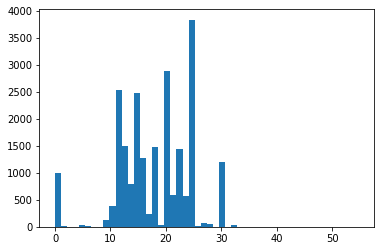

'Наименование столбца'

'secondary_cleaner.state.floatbank6_a_level'

'Гистограмма'

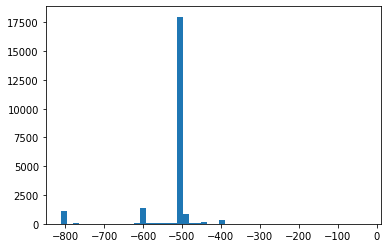

In [44]:
hist(df_full, 50)

In [45]:
df_full = df_full.fillna(method='ffill')

Заменил на предыдущее значение. Так как поступление датированное

[Home](#Оглавление)

<a name="Шаг_2"></a>

# 2. Анализ данных

#### как меняется концентрация металлов (Au, Ag, Pb)

In [46]:
concentrate_Au = ['concentrate_au']

In [47]:
concentrate_Ag = ['concentrate_ag']

In [48]:
concentrate_Pb = ['concentrate_pb']

In [49]:
df_Au_lst = concentrate(df_full, concentrate_Au)

In [50]:
df_Ag_lst = concentrate(df_full, concentrate_Ag)

In [51]:
df_Pb_lst = concentrate(df_full, concentrate_Pb)

In [52]:
df_full[df_Au_lst]

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
0,42.192020,34.174427,19.793808
1,42.701629,34.118526,20.050975
2,42.657501,33.969464,19.737170
3,42.689819,28.260743,19.320810
4,42.774141,33.044932,19.216101
...,...,...,...
22711,46.713954,32.940215,18.603550
22712,46.866780,32.925325,18.441436
22713,46.795691,31.856742,15.111231
22714,46.408188,30.770892,17.834772


In [53]:
for i in df_full[df_Au_lst]:
    display(i)
    display(df_full[i].median())
    display(df_full[i].mean())

'final.output.concentrate_au'

44.639019489227245

39.89171782316979

'primary_cleaner.output.concentrate_au'

32.34554186927547

29.119966533637303

'rougher.output.concentrate_au'

19.995512920079285

17.8315088804844

In [54]:
df_full[df_Ag_lst]

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,11.500771
1,6.029369,8.558743,11.615865
2,6.055926,8.603505,11.695753
3,6.047977,7.221879,11.915047
4,6.148599,9.089428,12.411054
...,...,...,...
22711,3.224920,6.559174,11.124896
22712,3.195978,6.612376,11.425983
22713,3.109998,7.128896,8.523497
22714,3.367241,7.490444,11.658799


In [55]:
for i in df_full[df_Ag_lst]:
    display(i)
    display(df_full[i].median())
    display(df_full[i].mean())

'final.output.concentrate_ag'

4.949959349365748

4.768012876038152

'primary_cleaner.output.concentrate_ag'

8.256061821763248

7.666971769305163

'rougher.output.concentrate_ag'

11.77411505936584

10.845609432117545

In [56]:
df_full[df_Pb_lst]

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,7.101074
1,9.968944,10.497069,7.278807
2,10.213995,10.354494,7.216833
3,9.977019,8.496563,7.175616
4,10.142511,9.986786,7.240205
...,...,...,...
22711,11.356233,12.445966,10.984003
22712,11.349355,12.623947,10.888213
22713,11.434366,12.633558,8.955135
22714,11.625587,12.012378,10.655377


In [57]:
for i in df_full[df_Pb_lst]:
    display(i)
    display(df_full[i].median())
    display(df_full[i].mean())

'final.output.concentrate_pb'

9.910362521939806

9.071366208756318

'primary_cleaner.output.concentrate_pb'

9.882875788859952

8.809217456953881

'rougher.output.concentrate_pb'

7.570890128480063

6.886869464260839

In [58]:
df_concentrat_table = pd.DataFrame(
    [
['final', '44.65', '4.95', '9.91'],
['primary_cleaner', '32.35', '8.26', '9.92'],
['rougher', '20.00', '11.78', '7.57']
    ]
)

In [59]:
df_concentrat_table.columns = ['name' ,'concentrate_Au','concentrate_Ag', 'concentrate_Pb']

Концентриция AU (золото) (output / параметр продукта, везде) от флотации до финала увеличивается более чем в два раза

Концентриция AG (серебро) уменьшается, так же более чем в два раза

Концентриция PB (свинец) увеличивается

In [60]:
for i in df_concentrat_table.columns[1:]:
    df_concentrat_table[i] = df_concentrat_table[i].astype('float')

In [61]:
df_concentrat_table

,name,concentrate_Au,concentrate_Ag,concentrate_Pb
0,final,44.65,4.95,9.91
1,primary_cleaner,32.35,8.26,9.92
2,rougher,20.00,11.78,7.57


'concentrate_Au'

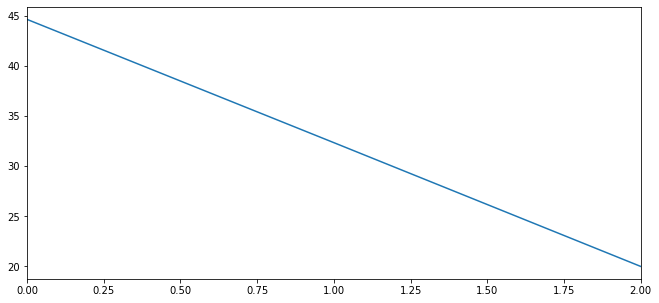

'concentrate_Ag'

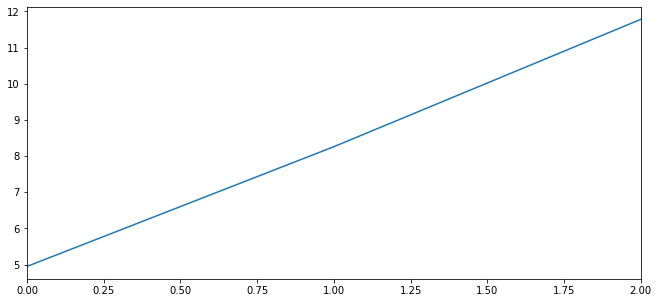

'concentrate_Pb'

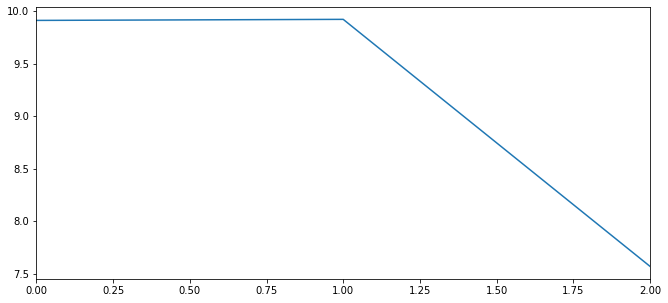

In [62]:
for i in df_concentrat_table.columns[1:]:
    df_concentrat_table[i].plot(figsize = (11, 5))
    display(i)
    plt.show()

#### распределения размеров гранул сырья

feed_size

In [63]:
feed_size = ['feed_size']

In [64]:
feed_size_lst_train = concentrate(df_train, feed_size)

In [65]:
feed_size_lst_train

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [66]:
feed_size_lst_test = concentrate(df_test, feed_size)

In [67]:
feed_size_lst_test

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

Нашел столбцы отдельно, проверил что совпадают

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Boxplot'

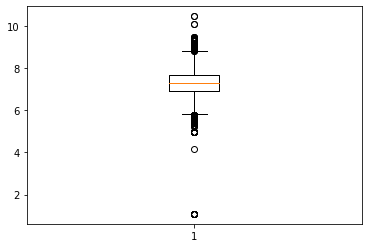

'Наименование столбца'

'rougher.input.feed_size'

'Boxplot'

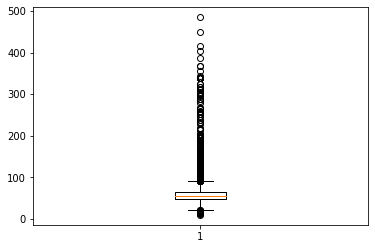

In [68]:
boxplot(df_train, feed_size_lst_train)

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Boxplot'

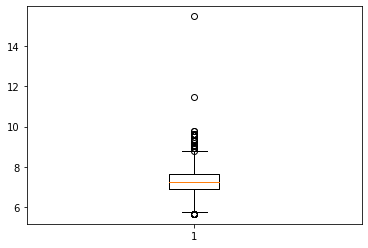

'Наименование столбца'

'rougher.input.feed_size'

'Boxplot'

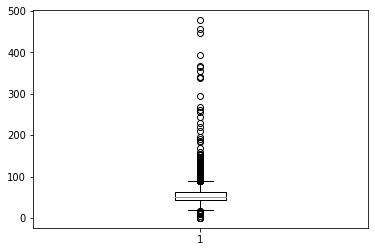

In [69]:
boxplot(df_test, feed_size_lst_test)

Сильно отличаются только на фоне выбросов

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Гистограмма'

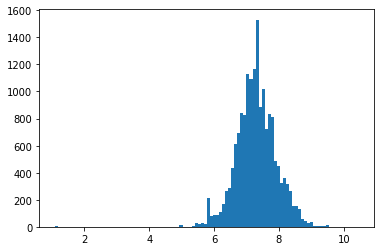

'Наименование столбца'

'rougher.input.feed_size'

'Гистограмма'

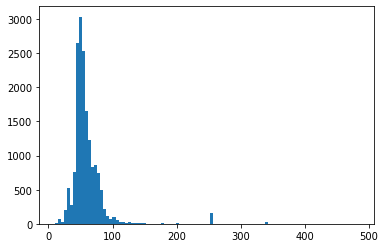

In [70]:
hist(df_train[feed_size_lst_train], 100)

'Наименование столбца'

'primary_cleaner.input.feed_size'

'Гистограмма'

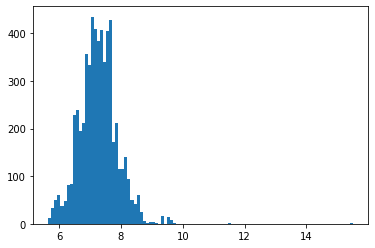

'Наименование столбца'

'rougher.input.feed_size'

'Гистограмма'

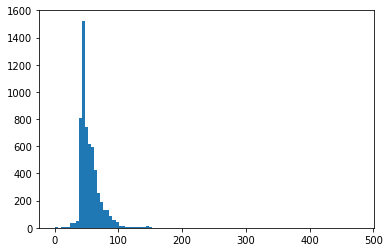

In [71]:
hist(df_test[feed_size_lst_test], 100)

In [72]:
feed_train_desc = df_train[feed_size_lst_train].describe()

In [73]:
feed_train_desc = feed_train_desc.reset_index()

In [74]:
feed_test_desc = df_test[feed_size_lst_test].describe()

In [75]:
feed_test_desc = feed_test_desc.reset_index()

In [76]:
feed_check = pd.concat([feed_train_desc, feed_test_desc], axis = 1)

In [77]:
feed_check

,index,primary_cleaner.input.feed_size,rougher.input.feed_size,index,primary_cleaner.input.feed_size,rougher.input.feed_size
0,count,16860.000000,16860.000000,count,5856.000000,5856.000000
1,mean,7.297285,60.188595,mean,7.264651,55.898866
2,std,0.619166,30.522242,std,0.611526,22.707969
3,min,1.080000,9.659576,min,5.650000,0.046369
4,25%,6.940000,47.548897,25%,6.885625,43.852884
5,50%,7.285000,54.066003,50%,7.259333,49.964796
6,75%,7.700000,65.397249,75%,7.650000,61.628003
7,max,10.470000,484.967466,max,15.500000,477.445473


Сильно различаются только на максимальных и минимальных значения. что было видно выше. Выбросы

#### суммарная концентрация всех веществ на разных стадиях

In [78]:
all_sum = ['output']

In [79]:
conc_all_sum = concentrate(df_full, all_sum)

In [80]:
all_sum_table = df_full[conc_all_sum]

In [81]:
conc_all_sum_not = ['final.output.recovery','final.output.tail_ag','final.output.tail_pb','final.output.tail_sol',
 'final.output.tail_au','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol','primary_cleaner.output.tail_au','rougher.output.recovery',
 'rougher.output.tail_ag','rougher.output.tail_pb','rougher.output.tail_sol','rougher.output.tail_au']

In [82]:
for i in conc_all_sum_not:
    del all_sum_table[i]

выбрал только значения output (параметры продукта) + потер лишнее

In [83]:
final_columns = ['final']

In [84]:
primary_cleaner_columns = ['primary_cleaner']

In [85]:
rougher_columns = ['rougher']

In [86]:
secondary_cleaner_columns = ['secondary_cleaner']

In [87]:
final_columns_lst = concentrate(all_sum_table, final_columns)

In [88]:
primary_cleaner_columns_lst = concentrate(all_sum_table, primary_cleaner_columns)

In [89]:
rougher_columns_lst = concentrate(all_sum_table, rougher_columns)

In [90]:
secondary_cleaner_columns_lst = concentrate(all_sum_table, secondary_cleaner_columns)

In [91]:
all_sum_table['final'] = all_sum_table.apply(lambda x: concentrate_summ(x, final_columns_lst), axis =  1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
all_sum_table['primary_cleaner'] = all_sum_table.apply(lambda x: concentrate_summ(x, primary_cleaner_columns_lst), axis =  1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
all_sum_table['rougher'] = all_sum_table.apply(lambda x: concentrate_summ(x, rougher_columns_lst), axis =  1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
all_sum_table['secondary_cleaner'] = all_sum_table.apply(lambda x: concentrate_summ(x, secondary_cleaner_columns_lst), axis =  1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
new_lst = ['final', 'primary_cleaner', 'rougher', 'secondary_cleaner']

'Наименование столбца'

'final'

'Гистограмма'

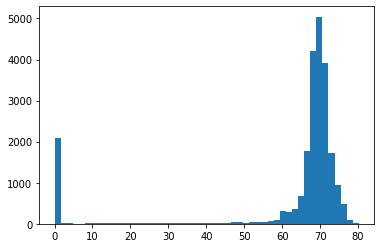

'Наименование столбца'

'primary_cleaner'

'Гистограмма'

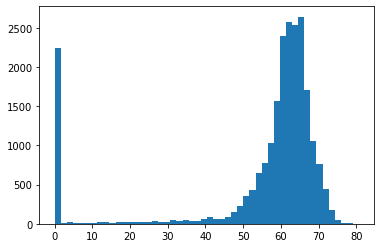

'Наименование столбца'

'rougher'

'Гистограмма'

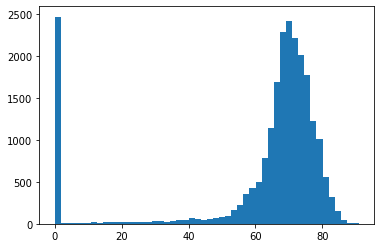

'Наименование столбца'

'secondary_cleaner'

'Гистограмма'

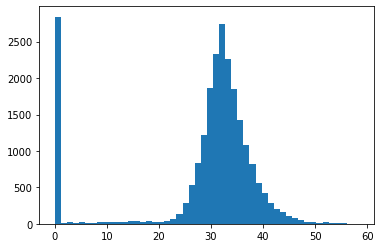

In [96]:
hist(all_sum_table[new_lst], 50)

Распределения нормальны. Много значений '0'. Надо убрать 0 из train. После удаления, скорее всего и длинные хвосты будут менее выделение.
На test эти параметры отсутствуют

#### df_train

In [97]:
df_train['final'] = df_train.apply(lambda x: concentrate_summ(x, final_columns_lst), axis =  1)

In [98]:
df_train['primary_cleaner'] = df_train.apply(lambda x: concentrate_summ(x, primary_cleaner_columns_lst), axis =  1)

In [99]:
df_train['rougher'] = df_train.apply(lambda x: concentrate_summ(x, rougher_columns_lst), axis =  1)

In [100]:
df_train['secondary_cleaner'] = df_train.apply(lambda x: concentrate_summ(x, secondary_cleaner_columns_lst), axis =  1)

In [101]:
df_train = df_train[df_train.final != 0]

In [102]:
df_train = df_train[df_train.primary_cleaner != 0]

In [103]:
df_train = df_train[df_train.rougher != 0]

In [104]:
df_train = df_train[df_train.secondary_cleaner != 0]

In [105]:
df_train = df_train[df_train.rougher != 0]

In [106]:
df_train = df_train[df_train['rougher.output.recovery'] != 0]

In [107]:
df_train = df_train[df_train['final.output.recovery'] != 0]

In [108]:
df_train.shape

(13913, 91)

In [109]:
df_train_not = ['final','primary_cleaner','rougher','secondary_cleaner']

'Наименование столбца'

'final'

'Гистограмма'

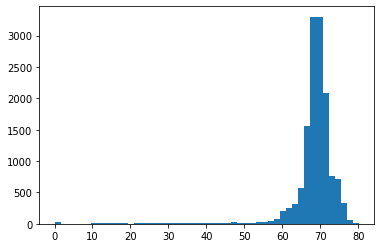

'Наименование столбца'

'primary_cleaner'

'Гистограмма'

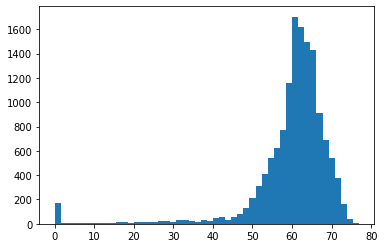

'Наименование столбца'

'rougher'

'Гистограмма'

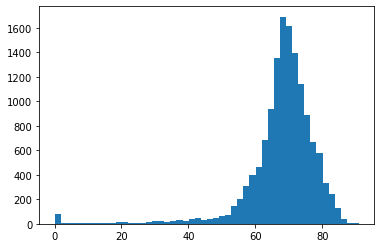

'Наименование столбца'

'secondary_cleaner'

'Гистограмма'

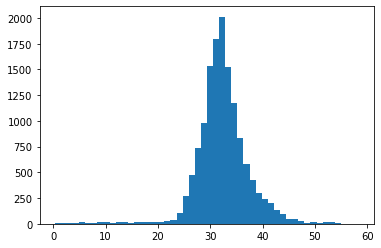

In [110]:
hist(df_train[df_train_not], 50)

In [111]:
quantile_min_max(df_train, df_train_not, 0.025, 0.925)

'final'

'Минимальное значение'

0.03999999910593033

'нижняя граница'

55.17086325611186

'верхняя граница'

73.94276407946658

'Максимальное значение'

80.21064419582288

'______________'

'primary_cleaner'

'Минимальное значение'

0.03999999910593033

'нижняя граница'

27.919636425147022

'верхняя граница'

69.44335237895638

'Максимальное значение'

76.91807573894499

'______________'

'rougher'

'Минимальное значение'

0.039898289954286605

'нижняя граница'

39.84718220989795

'верхняя граница'

78.9865532602117

'Максимальное значение'

90.9644309506383

'______________'

'secondary_cleaner'

'Минимальное значение'

0.2978731438356691

'нижняя граница'

24.232311489744944

'верхняя граница'

39.08108352715605

'Максимальное значение'

58.453347364645566

'______________'

In [112]:
for i in df_train_not:
    del df_train[i]

In [113]:
df_train.shape

(13913, 87)

In [114]:
df_train = df_train.reset_index()

In [115]:
df_train = df_train.drop(['index'], axis = 1)

Вывод

при просмотре суммарых значений концентратов стало заметно наличие большого количества нулей. После удаления нулей были выявлены длинные хвосты. Взял 95% интервал, остальные значения удалил.

в тестовой выборке таких значений нет.

#### df_full

In [116]:
data_full = df_full

In [117]:
data_full['final'] = data_full.apply(lambda x: concentrate_summ(x, final_columns_lst), axis =  1)

In [118]:
data_full['primary_cleaner'] = data_full.apply(lambda x: concentrate_summ(x, primary_cleaner_columns_lst), axis =  1)

In [119]:
data_full['rougher'] = data_full.apply(lambda x: concentrate_summ(x, rougher_columns_lst), axis =  1)

In [120]:
data_full['secondary_cleaner'] = data_full.apply(lambda x: concentrate_summ(x, secondary_cleaner_columns_lst), axis =  1)

In [121]:
data_full = data_full[data_full.final != 0]

In [122]:
data_full = data_full[data_full.primary_cleaner != 0]

In [123]:
data_full = data_full[data_full.rougher != 0]

In [124]:
data_full = data_full[data_full.secondary_cleaner != 0]

In [125]:
data_full_not = ['final','primary_cleaner','rougher','secondary_cleaner']

'Наименование столбца'

'final'

'Гистограмма'

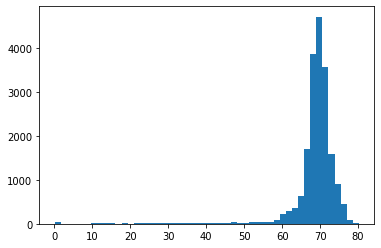

'Наименование столбца'

'primary_cleaner'

'Гистограмма'

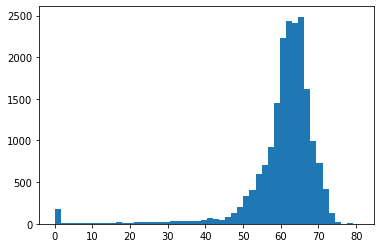

'Наименование столбца'

'rougher'

'Гистограмма'

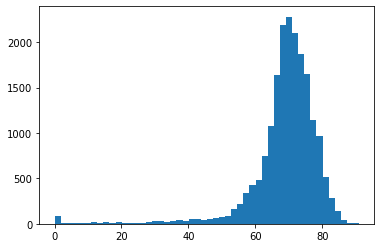

'Наименование столбца'

'secondary_cleaner'

'Гистограмма'

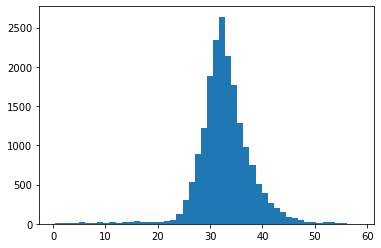

In [126]:
hist(data_full[data_full_not], 50)

In [127]:
quantile_min_max(data_full, data_full_not, 0.025, 0.925)

'final'

'Минимальное значение'

0.03999999910593033

'нижняя граница'

53.3722310435788

'верхняя граница'

73.87060521497017

'Максимальное значение'

80.21064419582288

'______________'

'primary_cleaner'

'Минимальное значение'

0.03999999910593033

'нижняя граница'

32.865493507589086

'верхняя граница'

69.2057126699093

'Максимальное значение'

80.74934277080497

'______________'

'rougher'

'Минимальное значение'

0.039898289954286605

'нижняя граница'

41.614511196683736

'верхняя граница'

79.05352876332486

'Максимальное значение'

90.9644309506383

'______________'

'secondary_cleaner'

'Минимальное значение'

0.2978731438356691

'нижняя граница'

24.184556272262284

'верхняя граница'

39.56484120073881

'Максимальное значение'

58.453347364645566

'______________'

In [128]:
for i in data_full_not:
    del data_full[i]

Много потерь. Удалил нули из сумм концентратов. Взял на просмотр интервал 95% и дулали значения, выходящие за этот интервал.

#### df_test

In [129]:
df_test['date'].value_counts().max()

1

In [130]:
df_full['date'].value_counts().max()

1

In [131]:
df_test_columns = df_test.columns

In [132]:
column_for_test = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [133]:
df_test = df_test.merge(column_for_test, how = 'left', left_on='date', right_on='date')

In [134]:
df_test = df_test.drop(['date'], axis = 1)

In [135]:
df_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
5852,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
5853,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
5854,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186


[Home](#Оглавление)

<a name="Шаг_3"></a>

# 3. Модель

#### СУММА ((y_true - y_pred).abs() / ((y_true.abs() + y_pred).abs() * 0.5)) * 100   /   КОЛИЧЕСТВО


итого
    у нас отредактированная df_train и df_full и df_test с доп столбцами целевого признака



Подготовлю data


In [136]:
def difference_columns(df_large, df_small):
    common = []
    difference = []
    df_large_col = df_large.columns
    df_small_col = df_small.columns
    for i in df_large_col:
        if i in df_small_col:
            common.append(i)
        else:
            difference.append(i)
    return common,difference

In [137]:
common,difference= difference_columns(df_train, df_test)


ф-ию заново, т.к добавил столбцы


In [138]:
for i in difference:
    del df_train[i]

In [139]:
df_train.shape

(13913, 54)

In [140]:
df_test.shape

(5856, 54)

In [141]:
for i in df_train.columns:
    df_train = df_train.loc[df_train[i] != 0]

In [142]:
for i in df_test.columns:
    df_test = df_test.loc[df_test[i] != 0]

In [143]:
df_train = df_train.reset_index(drop=True)

In [144]:
df_test = df_test.reset_index(drop=True)

In [145]:
features = df_train

In [146]:
features = features.drop(['final.output.recovery'], axis = 1)

In [147]:
features = features.drop(['rougher.output.recovery'], axis = 1)

In [148]:
target_final = df_train['final.output.recovery']

In [149]:
target_rouger =  df_train['rougher.output.recovery']

In [150]:
features_train, features_valid, target_train_final, target_valid_final = train_test_split(
    features, target_final, test_size=0.25, random_state=12345)

In [151]:
features_train, features_valid, target_train_rouger, target_valid_rouger = train_test_split(
    features, target_rouger, test_size=0.25, random_state=12345)


итого разбил для проверки метрики на train и valid


#### LinearRegression / RandomForestRegressor / DecisionTreeRegressor

In [152]:
model_LinearRegression = LinearRegression()

In [153]:
model_RandomForestRegressor = RandomForestRegressor(n_estimators = 10, random_state = 12345)

In [154]:
model_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 12345)

#### cross_val_score (стандартная функция)

In [155]:
cross_val_score_lr_final = (cross_val_score(model_LinearRegression, features, target_final, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [156]:
cross_val_score_lr_final

-8.414326006723815

In [157]:
cross_val_score_lr_rouger = (cross_val_score(model_LinearRegression, features, target_rouger, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [158]:
cross_val_score_lr_rouger

-8.187356623706583

In [159]:
cross_val_score_rfr_final = (cross_val_score(model_RandomForestRegressor, features, target_final, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [160]:
cross_val_score_rfr_final

-7.631177577263144

In [161]:
cross_val_score_rfr_rouger = (cross_val_score(model_RandomForestRegressor, features, target_rouger, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [162]:
cross_val_score_rfr_rouger

-6.920017627424443

In [163]:
cross_val_score_dtr_final = (cross_val_score(model_DecisionTreeRegressor, features, target_final, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [164]:
cross_val_score_dtr_final

-9.7436235822072

In [165]:
cross_val_score_dtr_rouger = (cross_val_score(model_DecisionTreeRegressor, features, target_rouger, cv=3, scoring = 'neg_mean_absolute_error')).mean()

In [166]:
cross_val_score_dtr_rouger

-8.423654630067558

Текущие значения показывают лучшей модель RandomForestRegressor



#### smape

#### LinearRegression

In [167]:
model_LinearRegression.fit(features_train, target_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
predict_mlr_final = model_LinearRegression.predict(features_valid)

In [169]:
target_valid_final = list(target_valid_final)

In [170]:
LinearRegression_smape_f = smape(target_valid_final, predict_mlr_final)

In [171]:
model_LinearRegression.fit(features_train, target_train_rouger)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
predict_mlr_rouger = model_LinearRegression.predict(features_valid)

In [173]:
target_valid_rouger = list(target_valid_rouger)

In [174]:
LinearRegression_smape_r = smape(target_valid_rouger, predict_mlr_rouger)

#### RandomForestRegressor

In [175]:
model_RandomForestRegressor.fit(features_train, target_train_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [176]:
predict_rfr_final = model_RandomForestRegressor.predict(features_valid)

In [177]:
target_valid_final = list(target_valid_final)

In [178]:
RandomForestRegressor_smape_f = smape(target_valid_final, predict_rfr_final)

In [179]:
model_RandomForestRegressor.fit(features_train, target_train_rouger)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [180]:
predict_rfr_rouger = model_RandomForestRegressor.predict(features_valid)

In [181]:
target_valid_rouger = list(target_valid_rouger)

In [182]:
RandomForestRegressor_smape_r = smape(target_valid_rouger, predict_rfr_rouger)

#### DecisionTreeRegressor

In [183]:
model_DecisionTreeRegressor.fit(features_train, target_train_final)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')

In [184]:
predict_dtr_final = model_DecisionTreeRegressor.predict(features_valid)

In [185]:
target_valid_final = list(target_valid_final)

In [186]:
DecisionTreeRegressor_smape_f = smape(target_valid_final, predict_dtr_final)

In [187]:
model_DecisionTreeRegressor.fit(features_train, target_train_rouger)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')

In [188]:
predict_dtr_rouger = model_DecisionTreeRegressor.predict(features_valid)

In [189]:
target_valid_rouger = list(target_valid_rouger)

In [190]:
DecisionTreeRegressor_smape_r = smape(target_valid_rouger, predict_dtr_rouger)

In [191]:
smape_model = [
    ['LinearRegression', LinearRegression_smape_f,  LinearRegression_smape_r],
    ['RandomForestRegressor', RandomForestRegressor_smape_f,  RandomForestRegressor_smape_r],
    ['DecisionTreeRegressor', DecisionTreeRegressor_smape_f,  DecisionTreeRegressor_smape_r]
]

In [192]:
smape_model = pd.DataFrame(smape_model)

In [193]:
smape_model.columns = ['model_name', 'final', 'rouger']

In [194]:
smape_model['final'] = smape_model['final'].astype('float')

In [195]:
smape_model['rouger'] = smape_model['rouger'].astype('float')

In [196]:
smape_model['smape_total'] = smape_model['final'] * 0.75 + smape_model['rouger'] * 0.25

In [197]:
smape_model['cross_val_accur_fin'] = [cross_val_score_lr_final, cross_val_score_rfr_final, cross_val_score_dtr_final]

In [198]:
smape_model['cross_val_accur_rougher'] = [cross_val_score_lr_rouger, cross_val_score_rfr_rouger, cross_val_score_dtr_rouger]

In [199]:
smape_model

,model_name,final,rouger,smape_total,cross_val_accur_fin,cross_val_accur_rougher
0,LinearRegression,8.541415,5.103077,7.681831,-8.414326,-8.187357
1,RandomForestRegressor,6.496825,3.194620,5.671274,-7.631178,-6.920018
2,DecisionTreeRegressor,8.448951,4.366387,7.428310,-9.743624,-8.423655


наименьшее расхождение между признаками предсказывает RandomForestRegressor


Так же можно сравнить наглядно и ф-ию кросс-валидации (c метрикой neg_mean_absolute_error)

#### кросс-валидация

#### LinearRegression()

In [200]:
rougher_cross_lr = cross_val(df_train, features, target_rouger, LinearRegression(), 5)

In [201]:
rougher_cross_lr = sum(rougher_cross_lr) / len(rougher_cross_lr)

In [202]:
final_cross_lr = cross_val(df_train, features, target_final, LinearRegression(), 5)

In [203]:
final_cross_lr = sum(final_cross_lr) / len(final_cross_lr)

In [204]:
rougher_cross_lr

6.761726121616683

In [205]:
final_cross_lr

10.612783392221848

#### RandomForestRegressor()

In [206]:
rougher_cross_rfr = cross_val(df_train, features, target_rouger, RandomForestRegressor(n_estimators = 10, random_state = 12345), 5)

In [207]:
rougher_cross_rfr = sum(rougher_cross_rfr) / len(rougher_cross_rfr)

In [208]:
final_cross_rfr = cross_val(df_train, features, target_final, RandomForestRegressor(n_estimators = 10, random_state = 12345), 5)

In [209]:
final_cross_rfr = sum(final_cross_rfr) / len(final_cross_rfr)

In [210]:
rougher_cross_rfr

6.521155120435865

In [211]:
final_cross_rfr

9.996470795789028

#### DecisionTreeRegressor()

In [212]:
rougher_cross_dtr = cross_val(df_train, features, target_rouger, DecisionTreeRegressor(random_state = 12345), 5)

In [213]:
rougher_cross_dtr = sum(rougher_cross_dtr) / len(rougher_cross_dtr)

In [214]:
final_cross_dtr = cross_val(df_train, features, target_final, DecisionTreeRegressor(random_state = 12345), 5)

In [215]:
final_cross_dtr = sum(final_cross_dtr) / len(final_cross_dtr)

In [216]:
rougher_cross_dtr

8.219390169943564

In [217]:
final_cross_dtr

16.40553651414531

Компановка в table

In [218]:
smape_model['rougher_cross'] = [rougher_cross_lr, rougher_cross_rfr, rougher_cross_dtr]

In [219]:
smape_model['final_cross'] = [final_cross_lr, final_cross_rfr, final_cross_dtr]

In [220]:
smape_model

,model_name,final,rouger,smape_total,cross_val_accur_fin,cross_val_accur_rougher,rougher_cross,final_cross
0,LinearRegression,8.541415,5.103077,7.681831,-8.414326,-8.187357,6.761726,10.612783
1,RandomForestRegressor,6.496825,3.194620,5.671274,-7.631178,-6.920018,6.521155,9.996471
2,DecisionTreeRegressor,8.448951,4.366387,7.428310,-9.743624,-8.423655,8.219390,16.405537


In [221]:
smape_model['smape_total_cross'] = smape_model['final_cross'] * 0.75 + smape_model['rougher_cross'] * 0.25

In [222]:
smape_total = ['model_name', 'smape_total', 'smape_total_cross']

In [223]:
smape_model[smape_total]

,model_name,smape_total,smape_total_cross
0,LinearRegression,7.681831,9.650019
1,RandomForestRegressor,5.671274,9.127642
2,DecisionTreeRegressor,7.428310,14.359000


При кросс валидации моделью с наименьшим процентным отклонением остается RandomForestRegressor

Так же по итоговому 

#### Сравнение с константной моделью

In [224]:
predict_static_rougher = pd.Series(target_train_rouger.mean(), index = target_valid_rouger)

In [225]:
predict_static_final = pd.Series(target_train_final.mean(), index = target_valid_final)

In [226]:
predict_lr_r = model_LinearRegression.predict(features_valid)

In [227]:
predict_rfr_r = model_RandomForestRegressor.predict(features_valid)

In [228]:
predict_dtr_r = model_DecisionTreeRegressor.predict(features_valid)

In [229]:
predict_lr_r_smape = smape(list(predict_static_rougher), predict_lr_r)

In [230]:
predict_rfr_r_smape = smape(list(predict_static_rougher), predict_rfr_r)

In [231]:
predict_dtr_r_smape = smape(list(predict_static_rougher), predict_dtr_r)

In [232]:
predict_lr_f_smape = smape(list(predict_static_final), predict_lr_r)

In [233]:
predict_rfr_f_smape = smape(list(predict_static_final), predict_rfr_r)

In [234]:
predict_dtr_f_smape = smape(list(predict_static_final), predict_dtr_r)

In [235]:
smape_model['static_rougher'] = [predict_lr_r_smape, predict_rfr_r_smape, predict_dtr_r_smape]

In [236]:
smape_model['static_final'] = [predict_lr_f_smape, predict_rfr_f_smape, predict_dtr_f_smape]

In [237]:
smape_model['smape_total_static'] = smape_model['static_final'] * 0.75 + smape_model['static_rougher'] * 0.25

In [238]:
smape_total = ['model_name', 'smape_total', 'smape_total_cross', 'smape_total_static']

In [239]:
smape_total_table = smape_model[smape_total]

In [240]:
smape_total_table

,model_name,smape_total,smape_total_cross,smape_total_static
0,LinearRegression,7.681831,9.650019,18.913560
1,RandomForestRegressor,5.671274,9.127642,19.377685
2,DecisionTreeRegressor,7.428310,14.359000,20.002207


с константой отклонение большое при расчете соотношения final * 0.75 + rougher * 0.25

In [241]:
model_top = smape_total_table[smape_total_table.model_name == 'RandomForestRegressor']

In [242]:
model_top

,model_name,smape_total,smape_total_cross,smape_total_static
1,RandomForestRegressor,5.671274,9.127642,19.377685



В итоге лучше всего себя показала модель RandomForestRegressor
Выше сравнение
Метрика sMAPE итоговая.на обученной модели и кросс валидация + сравнение с констанотой


#### Total model

model_RandomForestRegressor_rougher

model_RandomForestRegressor_final

#### Проверка

In [243]:
model_top

,model_name,smape_total,smape_total_cross,smape_total_static
1,RandomForestRegressor,5.671274,9.127642,19.377685


In [244]:
df_train.columns

Index(['final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 

In [245]:
model = RandomForestRegressor(n_estimators = 10,random_state = 12345)

In [246]:
model_rougher = model.fit(features, target_rouger)

In [247]:
model_final = model.fit(features, target_final)

In [248]:
df_test_target_rougher = df_test['rougher.output.recovery']

In [249]:
df_test_target_final = df_test['final.output.recovery']

In [250]:
df_test = df_test.drop(['rougher.output.recovery'], axis = 1)

In [251]:
df_test = df_test.drop(['final.output.recovery'], axis = 1)

In [252]:
predict_r = model_rougher.predict(df_test)

In [253]:
predict_f = model_final.predict(df_test)

In [254]:
smape(list(df_test_target_rougher), predict_r)

27.554870157125894

In [255]:
smape(list(df_test_target_final), predict_f)

10.831166064184114

In [256]:
model_top

,model_name,smape_total,smape_total_cross,smape_total_static
1,RandomForestRegressor,5.671274,9.127642,19.377685


In [257]:
smape(list(df_test_target_rougher), predict_r) * 0.25 + smape(list(df_test_target_final), predict_f) * 0.75

15.012092087419557

In [258]:
for i in range(1,21,1):
    model = RandomForestRegressor(n_estimators = 10,max_depth = i, random_state = 12345)
    model_rougher = model.fit(features, target_rouger)
    model_final = model.fit(features, target_final)
    predict_r = model_rougher.predict(df_test)
    predict_f = model_final.predict(df_test)
    z = smape(list(df_test_target_rougher), predict_r) * 0.25 + smape(list(df_test_target_final), predict_f) * 0.75
    display(z)

12.044626789029081

11.626044754553753

12.80657299313828

13.214589305940269

14.824863202681946

14.018894769267465

15.336812694458734

14.292820007465263

13.78005850067847

14.185814839289241

14.550632840229605

14.825894641663897

14.73661340626434

15.0727466755

14.92552134664972

14.969389259209967

15.594427058758296

15.620247948942314

14.544913522930983

15.513342693222073

In [259]:
for i in range(1,101,10):
    model = RandomForestRegressor(n_estimators = i,max_depth = 2, random_state = 12345)
    model_rougher = model.fit(features, target_rouger)
    model_final = model.fit(features, target_final)
    predict_r = model_rougher.predict(df_test)
    predict_f = model_final.predict(df_test)
    z = smape(list(df_test_target_rougher), predict_r) * 0.25 + smape(list(df_test_target_final), predict_f) * 0.75
    display(z)

11.497316649027884

11.617705766284853

11.600030387492083

11.605225268737142

11.587744513833409

11.573692587514788

11.578558452800461

11.572462119462188

11.571391039515046

11.57304658697634

In [260]:
model = RandomForestRegressor(n_estimators = 10,max_depth = 2, random_state = 12345)

In [261]:
model_rougher = model.fit(features, target_rouger)

In [262]:
model_final = model.fit(features, target_final)

In [263]:
predict_r = model_rougher.predict(df_test)

In [264]:
smape(list(df_test_target_rougher), predict_r)

23.096553413654643

In [265]:
predict_f = model_final.predict(df_test)

In [266]:
smape(list(df_test_target_final), predict_f)

7.802541868186791

In [267]:
z = smape(list(df_test_target_rougher), predict_r) * 0.25 + smape(list(df_test_target_final), predict_f) * 0.75

In [268]:
model_top['test_total_smape'] = z

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
model_top

,model_name,smape_total,smape_total_cross,smape_total_static,test_total_smape
1,RandomForestRegressor,5.671274,9.127642,19.377685,11.626045



Итог

Получилось достичь только значения на тесте 11,62. Что лучше чем константа, но следует отметить, что при наличии бОльшего количества столбцов результат будет лучше.
